## Import the Required Libraries

In [11]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.0f}'.format


# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 


In [12]:
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

### Load the dataset:


In [13]:
# load the dataset using panda detaframe
crop_prod=pd.read_csv("Crop_Production_Data.csv")

In [14]:
crop_prod.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop  Area  Production  
0             Arecanut  1254        2000  
1  Other Kharif pulses     2           1  
2                 Rice   102         321  
3               Banana   176         641  
4            Cashewnut   720         165

**Information about dataset**
- The Dataset is about the crop-production from year 1997 to 2015.
- The Dataset contains columns :
    - State_Name:The Name of the State 
    - District_Name: The Name od District
    - Crop_Year: The Year of Production
    - Season: Season of the crop
    - Crop: Name of the crop
    - Area : Agricultural land
    - Production: The Production of the crop which is also our traget column
        

In [15]:
# Tells us how many rows and columns are there.
crop_prod.shape

(246091, 7)

In [16]:
# Code to show the basic information about the data.
crop_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246053 non-null  object 
 1   District_Name  245871 non-null  object 
 2   Crop_Year      245992 non-null  float64
 3   Season         245999 non-null  object 
 4   Crop           246006 non-null  object 
 5   Area           245580 non-null  float64
 6   Production     242340 non-null  float64
dtypes: float64(3), object(4)
memory usage: 13.1+ MB


In [17]:
#Show the density of the data
crop_prod.describe().T

count   mean      std  min  25%  50%  75%        max
Crop_Year  245992   2006        5 1997 2002 2006 2010       2015
Area       245580  12017    50571    0   80  583 4400    8580100
Production 242340 582554 17066552    0   88  729 7025 1250800000

In [18]:
#Code to show the basic central tendency of the data.
crop_prod.mean()

Crop_Year      2006
Area          12017
Production   582554
dtype: float64

In [19]:
crop_prod.median()

Crop_Year    2006
Area          583
Production    729
dtype: float64

In [20]:
#Show the Datatypes of the data
crop_prod.dtypes

State_Name        object
District_Name     object
Crop_Year        float64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

**Data Overview**

- The dataset contains 246091 rows and 7 columns
- The size od dataset is arround 1722637 bit and memory usage is arroud 13.1+MB.
- There are 4 Categorical and 3 Numerical columns.
- Area and Productions columns contains outlier by looking at the diffrence between mean and median (50%)


### Null-value Handling:

In [21]:
# Show the percentage and count of missing values.
null_count=crop_prod.isnull().sum()
null_count

State_Name         38
District_Name     220
Crop_Year          99
Season             92
Crop               85
Area              511
Production       3751
dtype: int64

In [22]:
count_perc=((crop_prod.isnull().sum())/len(crop_prod))*100
count_perc

State_Name      0
District_Name   0
Crop_Year       0
Season          0
Crop            0
Area            0
Production      2
dtype: float64

In [23]:
null_df=pd.concat([null_count,count_perc], axis=1, keys=["Total","Percentage"])
null_df

Total  Percentage
State_Name        38           0
District_Name    220           0
Crop_Year         99           0
Season            92           0
Crop              85           0
Area             511           0
Production      3751           2

In [24]:
# Treat the missing value based on requirement.(Don't Remove the nul values)


- We will treat the null values of the columns one by one:

**State_Name**

In [25]:
crop_prod.State_Name.value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18872
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9613
West Bengal                     9607
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4892
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

In [26]:
crop_prod[crop_prod.State_Name.isnull()]

State_Name District_Name  Crop_Year       Season       Crop  Area  \
3181          NaN        GUNTUR       2014  Kharif       Arhar/Tur   NaN   
3207          NaN        GUNTUR       2014  Rabi         Arhar/Tur   NaN   
3232          NaN        KADAPA       1997  Kharif       Arhar/Tur   NaN   
3258          NaN        KADAPA       1998  Kharif       Arhar/Tur   NaN   
3319          NaN        KADAPA       2000  Kharif       Arhar/Tur   NaN   
3341          NaN        KADAPA       2000  Rabi         Arhar/Tur   NaN   
3368          NaN        KADAPA       2001  Kharif       Arhar/Tur   NaN   
3389          NaN        KADAPA       2001  Rabi         Arhar/Tur   NaN   
3416          NaN        KADAPA       2002  Kharif             NaN   NaN   
3434          NaN        KADAPA       2002  Rabi               NaN   NaN   
3472          NaN        KADAPA       2003  Kharif             NaN   NaN   
3490          NaN        KADAPA       2003  Rabi               NaN   NaN   
3526          NaN        KADAPA       2004  Kharif             NaN   NaN   
3544          NaN        KADAPA       2004  Rabi               NaN   NaN   
3570          NaN        KADAPA       2005  Kharif             NaN   NaN   
30822         NaN           NaN        NaN          NaN  Arhar/Tur   403   
30843         NaN           NaN        NaN          NaN  Arhar/Tur   345   
30864         NaN           NaN        NaN          NaN  Arhar/Tur  1017   
30894         NaN           NaN        NaN          NaN  Arhar/Tur   959   
30922         NaN           NaN        NaN          NaN  Arhar/Tur   872   
30953         NaN           NaN        NaN          NaN  Arhar/Tur   907   
30983         NaN           NaN        NaN          NaN  Arhar/Tur   881   
31011         NaN           NaN        NaN          NaN  Arhar/Tur   371   
31046         NaN           NaN        NaN          NaN  Arhar/Tur   419   
31078         NaN           NaN        NaN          NaN  Arhar/Tur   273   
31114         NaN           NaN        NaN          NaN  Arhar/Tur   331   
31146         NaN           NaN        NaN          NaN  Arhar/Tur   356   
31167         NaN           NaN        NaN          NaN  Arhar/Tur   191   
231669        NaN           NaN        NaN          NaN        NaN     7   
231710        NaN           NaN        NaN          NaN        NaN     1   
231733        NaN           NaN        NaN          NaN        NaN     5   
231759        NaN           NaN        NaN          NaN        NaN     5   
245743        NaN           NaN        NaN          NaN        NaN  1253   
245779        NaN           NaN        NaN          NaN        NaN  1234   
245819        NaN           NaN        NaN          NaN        NaN   415   
245861        NaN           NaN        NaN          NaN        NaN   144   
245902        NaN           NaN        NaN          NaN        NaN   107   
245938        NaN           NaN        NaN          NaN        NaN   105   

        Production  
3181         13805  
3207           301  
3232          1400  
3258          4400  
3319          8369  
3341            93  
3368          7139  
3389            40  
3416          2605  
3434             6  
3472          8997  
3490            23  
3526          4809  
3544            11  
3570          4377  
30822          965  
30843          689  
30864         1665  
30894         1106  
30922          901  
30953         1248  
30983          537  
31011          467  
31046          194  
31078          321  
31114          276  
31146          265  
31167          187  
231669           4  
231710           1  
231733           4  
231759           4  
245743        1020  
245779        1024  
245819         308  
245861          63  
245902          73  
245938          95

- We will fill the null value of State with most occured value i.e "Uttar Pradesh"

In [27]:
crop_prod.State_Name.isnull().sum()

38

In [28]:
crop_prod["State_Name"].fillna("Uttar Pradesh", inplace=True)

In [29]:
crop_prod.State_Name.isnull().sum()

0

In [30]:
crop_prod.isnull().sum()

State_Name          0
District_Name     220
Crop_Year          99
Season             92
Crop               85
Area              511
Production       3751
dtype: int64

**District Name**

In [31]:
crop_prod.District_Name.value_counts().sort_values(ascending=False)

BIJAPUR                     945
TUMKUR                      936
BELGAUM                     925
HASSAN                      895
BELLARY                     887
DAVANGERE                   886
AURANGABAD                  878
HAVERI                      870
CHAMARAJANAGAR              844
CHITRADURGA                 840
GULBARGA                    833
MYSORE                      832
KURNOOL                     827
DHARWAD                     825
SHIMOGA                     825
KADAPA                      824
CHIKMAGALUR                 820
BILASPUR                    815
BANGALORE RURAL             794
CHITTOOR                    789
ANANTAPUR                   788
VISAKHAPATANAM              785
BIDAR                       781
MANDYA                      780
PRAKASAM                    779
EAST GODAVARI               765
GADAG                       755
BAGALKOT                    733
VIZIANAGARAM                722
MEDAK                       714
RANGAREDDI                  693
RAICHUR 

In [32]:
crop_prod[crop_prod["District_Name"].isnull()]

State_Name District_Name  Crop_Year       Season       Crop  Area  \
5488    Andhra Pradesh           NaN       2014  Rabi         Arhar/Tur   NaN   
5520    Andhra Pradesh           NaN       1997  Kharif       Arhar/Tur   NaN   
5549    Andhra Pradesh           NaN       1998  Kharif       Arhar/Tur   NaN   
5564    Andhra Pradesh           NaN       1998  Rabi         Arhar/Tur   NaN   
5612    Andhra Pradesh           NaN       2000  Kharif       Arhar/Tur   NaN   
5635    Andhra Pradesh           NaN       2000  Rabi         Arhar/Tur   NaN   
5663    Andhra Pradesh           NaN       2001  Kharif       Arhar/Tur   NaN   
5682    Andhra Pradesh           NaN       2001  Rabi         Arhar/Tur   NaN   
5710    Andhra Pradesh           NaN       2002  Kharif       Arhar/Tur   NaN   
5729    Andhra Pradesh           NaN       2002  Rabi         Arhar/Tur   NaN   
5769    Andhra Pradesh           NaN       2003  Kharif       Arhar/Tur   NaN   
5789    Andhra Pradesh           NaN       2003  Rabi         Arhar/Tur   NaN   
5830    Andhra Pradesh           NaN       2004  Kharif       Arhar/Tur   NaN   
5847    Andhra Pradesh           NaN       2004  Rabi         Arhar/Tur   NaN   
5873    Andhra Pradesh           NaN       2005  Kharif       Arhar/Tur   NaN   
5914    Andhra Pradesh           NaN       2006  Kharif       Arhar/Tur   NaN   
5931    Andhra Pradesh           NaN       2006  Rabi         Arhar/Tur   NaN   
5958    Andhra Pradesh           NaN       2007  Kharif       Arhar/Tur   NaN   
5984    Andhra Pradesh           NaN       2008  Kharif       Arhar/Tur   NaN   
6000    Andhra Pradesh           NaN       2008  Rabi         Arhar/Tur   NaN   
6024    Andhra Pradesh           NaN       2009  Kharif       Arhar/Tur   NaN   
6039    Andhra Pradesh           NaN       2009  Rabi         Arhar/Tur   NaN   
6064    Andhra Pradesh           NaN       2010  Kharif       Arhar/Tur   NaN   
6102    Andhra Pradesh           NaN       2011  Kharif       Arhar/Tur   NaN   
6144    Andhra Pradesh           NaN       2012  Kharif       Arhar/Tur   NaN   
6174    Andhra Pradesh           NaN       2012  Rabi         Arhar/Tur   NaN   
6202    Andhra Pradesh           NaN       2013  Kharif       Arhar/Tur   NaN   
6233    Andhra Pradesh           NaN       2013  Rabi         Arhar/Tur   NaN   
6268    Andhra Pradesh           NaN       2014  Kharif       Arhar/Tur   NaN   
6297    Andhra Pradesh           NaN       2014  Rabi         Arhar/Tur   NaN   
6328    Andhra Pradesh           NaN       1997  Kharif       Arhar/Tur   NaN   
6341    Andhra Pradesh           NaN       1997  Rabi         Arhar/Tur   NaN   
6352    Andhra Pradesh           NaN       1998  Kharif       Arhar/Tur   NaN   
6365    Andhra Pradesh           NaN       1998  Rabi         Arhar/Tur   NaN   
6407    Andhra Pradesh           NaN       2000  Kharif       Arhar/Tur   NaN   
6425    Andhra Pradesh           NaN       2000  Rabi         Arhar/Tur   NaN   
6449    Andhra Pradesh           NaN       2001  Kharif       Arhar/Tur   NaN   
6463    Andhra Pradesh           NaN       2001  Rabi         Arhar/Tur   NaN   
6486    Andhra Pradesh           NaN       2002  Kharif       Arhar/Tur   NaN   
6503    Andhra Pradesh           NaN       2002  Rabi         Arhar/Tur   NaN   
6541    Andhra Pradesh           NaN       2003  Kharif       Arhar/Tur   NaN   
6556    Andhra Pradesh           NaN       2003  Rabi         Arhar/Tur   NaN   
6593    Andhra Pradesh           NaN       2004  Kharif       Arhar/Tur   NaN   
6608    Andhra Pradesh           NaN       2004  Rabi         Arhar/Tur   NaN   
6632    Andhra Pradesh           NaN       2005  Kharif       Arhar/Tur   NaN   
6667    Andhra Pradesh           NaN       2006  Kharif       Arhar/Tur   NaN   
6702    Andhra Pradesh           NaN       2007  Kharif       Arhar/Tur   NaN   
6721    Andhra Pradesh           NaN       2008  Kharif       Arhar/Tur   NaN   
6736    Andhra Pradesh           NaN       

- We will fill the District Name according to the State Name.
- For each state will first find the maximum occured state and will fill accordingly.

In [33]:
#List of State where District is null

state_name=list(crop_prod["State_Name"][crop_prod["District_Name"].isnull()].unique())
state_name

['Andhra Pradesh', 'Assam', 'Bihar', 'Uttar Pradesh']

In [34]:
for i in state_name:
    crop_prod["District_Name"].fillna(crop_prod[crop_prod["State_Name"]==i]["District_Name"].value_counts().sort_values(ascending=False).keys()[0], inplace=True)
    
    

**Crop_Year**

In [35]:
crop_prod.Crop_Year.isnull().sum()

99

In [36]:
crop_prod.Crop_Year.value_counts().sort_values(ascending=False).keys()[0]

2003.0

In [37]:
#crop_prod[crop_prod.isnull()]

In [38]:
crop_prod[crop_prod["Crop_Year"].isnull()]

State_Name District_Name  Crop_Year       Season       Crop  Area  \
615     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 37000   
635     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 34067   
671     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 20269   
688     Andhra Pradesh     ANANTAPUR        NaN  Rabi         Arhar/Tur   316   
711     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 66013   
751     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 51728   
771     Andhra Pradesh     ANANTAPUR        NaN  Rabi         Arhar/Tur    17   
799     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 56586   
857     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 49932   
927     Andhra Pradesh     ANANTAPUR        NaN  Kharif       Arhar/Tur 37562   
991     Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  6100   
1012    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  6100   
1068    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  6032   
1118    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  5403   
1163    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  4113   
1181    Andhra Pradesh      CHITTOOR        NaN  Rabi         Arhar/Tur    17   
1223    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  8476   
1243    Andhra Pradesh      CHITTOOR        NaN  Rabi         Arhar/Tur    10   
1282    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  8225   
1327    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  7752   
1369    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur  5496   
1386    Andhra Pradesh      CHITTOOR        NaN  Rabi         Arhar/Tur     2   
1412    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur   NaN   
1433    Andhra Pradesh      CHITTOOR        NaN  Kharif       Arhar/Tur   NaN   
27143            Bihar        ARARIA        NaN          NaN  Arhar/Tur   483   
27179            Bihar        ARARIA        NaN          NaN  Arhar/Tur   302   
27217            Bihar        ARARIA        NaN          NaN  Arhar/Tur  2901   
27257            Bihar        ARARIA        NaN          NaN  Arhar/Tur  1181   
27299            Bihar        ARARIA        NaN          NaN  Arhar/Tur   258   
27335            Bihar        ARARIA        NaN          NaN  Arhar/Tur   325   
27361            Bihar        ARARIA        NaN          NaN  Arhar/Tur   371   
27395            Bihar        ARARIA        NaN          NaN  Arhar/Tur   419   
27431            Bihar        ARARIA        NaN          NaN  Arhar/Tur   321   
27454            Bihar        ARARIA        NaN          NaN  Arhar/Tur   122   
27479            Bihar        ARARIA        NaN          NaN  Arhar/Tur   118   
27504            Bihar        ARARIA        NaN          NaN  Arhar/Tur   118   
27529            Bihar        ARARIA        NaN          NaN  Arhar/Tur   279   
27554            Bihar        ARARIA        NaN          NaN  Arhar/Tur     5   
27572            Bihar         ARWAL        NaN          NaN  Arhar/Tur    76   
27604            Bihar         ARWAL        NaN          NaN  Arhar/Tur    24   
27636            Bihar         ARWAL        NaN          NaN  Arhar/Tur   148   
27671            Bihar         ARWAL        NaN          NaN  Arhar/Tur    60   
27701            Bihar         ARWAL        NaN          NaN  Arhar/Tur   120   
28296            Bihar       KURNOOL        NaN          NaN        NaN   NaN   
28316            Bihar       KURNOOL        NaN          NaN        NaN   NaN   
28340            Bihar       KURNOOL        NaN          NaN        NaN   NaN   
28364            Bihar       KURNOOL        NaN          NaN        NaN   NaN   
28389            Bihar       KURNOOL        NaN          NaN        NaN   NaN   
28421            Bihar       KURNOOL       

In [39]:
#To fill the value of Crop_Year we will use maximum occured value i.e 2003.

crop_prod["Crop_Year"].fillna(crop_prod.Crop_Year.value_counts().sort_values(ascending=False).keys()[0], inplace= True)

In [40]:
crop_prod["Crop_Year"].isnull().sum()

0

**Season**

In [41]:
crop_prod["Season"].isnull().sum()

92

In [42]:
crop_prod["Season"].value_counts()

Kharif         95873
Rabi           66973
Whole Year     57305
Summer         14841
Winter          6058
Autumn          4949
Name: Season, dtype: int64

In [43]:
crop_prod["Season"].value_counts().sort_values(ascending=False).keys()[0]

'Kharif     '

- we will fill the null values with the maximumn occured value i.e 'Kharif' as Season is a Categorical Column.

In [44]:
crop_prod["Season"].fillna(crop_prod["Season"].value_counts().sort_values(ascending=False).keys()[0], inplace=True)

In [45]:
crop_prod["Season"].isnull().sum()

0

In [46]:
crop_prod.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop               85
Area              511
Production       3751
dtype: int64

**Crop**

In [47]:
crop_prod.Crop.value_counts()

Rice                         15104
Maize                        13947
Moong(Green Gram)            10318
Urad                          9850
Sesamum                       9046
Groundnut                     8834
Sugarcane                     7921
Wheat                         7899
Rapeseed &Mustard             7592
Arhar/Tur                     7493
Gram                          7361
Jowar                         7065
Onion                         7012
Potato                        6931
Dry chillies                  6489
Sunflower                     5571
Bajra                         5427
Small millets                 4652
Peas & beans (Pulses)         4524
Cotton(lint)                  4518
Linseed                       4405
Masoor                        4224
Turmeric                      4202
Barley                        4199
Sweet potato                  4198
Ragi                          4145
Horse-gram                    3902
Other Kharif pulses           3659
Castor seed         

In [48]:
crop_prod[crop_prod["Crop"].isnull()]

State_Name District_Name  Crop_Year       Season Crop  Area  \
3416     Uttar Pradesh        KADAPA       2002  Kharif       NaN   NaN   
3434     Uttar Pradesh        KADAPA       2002  Rabi         NaN   NaN   
3472     Uttar Pradesh        KADAPA       2003  Kharif       NaN   NaN   
3490     Uttar Pradesh        KADAPA       2003  Rabi         NaN   NaN   
3526     Uttar Pradesh        KADAPA       2004  Kharif       NaN   NaN   
3544     Uttar Pradesh        KADAPA       2004  Rabi         NaN   NaN   
3570     Uttar Pradesh        KADAPA       2005  Kharif       NaN   NaN   
3612    Andhra Pradesh        KADAPA       2006  Kharif       NaN   NaN   
3628    Andhra Pradesh        KADAPA       2006  Rabi         NaN   NaN   
3654    Andhra Pradesh        KADAPA       2007  Kharif       NaN   NaN   
3673    Andhra Pradesh        KADAPA       2008  Kharif       NaN   NaN   
3716    Andhra Pradesh        KADAPA       2009  Kharif       NaN   NaN   
3734    Andhra Pradesh        KADAPA       2009  Rabi         NaN   NaN   
3760    Andhra Pradesh        KADAPA       2010  Kharif       NaN   NaN   
3778    Andhra Pradesh        KADAPA       2010  Rabi         NaN   NaN   
3807    Andhra Pradesh        KADAPA       2011  Kharif       NaN   NaN   
3826    Andhra Pradesh        KADAPA       2011  Rabi         NaN   NaN   
3854    Andhra Pradesh        KADAPA       2012  Kharif       NaN   NaN   
3886    Andhra Pradesh        KADAPA       2012  Rabi         NaN   NaN   
3921    Andhra Pradesh        KADAPA       2013  Kharif       NaN   NaN   
3956    Andhra Pradesh        KADAPA       2013  Rabi         NaN   NaN   
3991    Andhra Pradesh        KADAPA       2014  Kharif       NaN   NaN   
4024    Andhra Pradesh        KADAPA       2014  Rabi         NaN   NaN   
4056    Andhra Pradesh       KRISHNA       1997  Kharif       NaN   NaN   
4079    Andhra Pradesh       KRISHNA       1998  Kharif       NaN   NaN   
4089    Andhra Pradesh       KRISHNA       1998  Rabi         NaN   NaN   
4126    Andhra Pradesh       KRISHNA       2000  Kharif       NaN   NaN   
4140    Andhra Pradesh       KRISHNA       2000  Rabi         NaN   NaN   
4164    Andhra Pradesh       KRISHNA       2001  Kharif       NaN   NaN   
4177    Andhra Pradesh       KRISHNA       2001  Rabi         NaN   NaN   
4202    Andhra Pradesh       KRISHNA       2002  Kharif       NaN   NaN   
4215    Andhra Pradesh       KRISHNA       2002  Rabi         NaN   NaN   
4255    Andhra Pradesh       KRISHNA       2003  Kharif       NaN   NaN   
4308    Andhra Pradesh       KRISHNA       2004  Kharif       NaN   NaN   
4321    Andhra Pradesh       KRISHNA       2004  Rabi         NaN   NaN   
4345    Andhra Pradesh       KRISHNA       2005  Kharif       NaN   NaN   
4379    Andhra Pradesh       KRISHNA       2006  Kharif       NaN   NaN   
4411    Andhra Pradesh       KRISHNA       2007  Kharif       NaN   NaN   
4428    Andhra Pradesh       KRISHNA       2008  Kharif       NaN   NaN   
4460    Andhra Pradesh       KRISHNA       2009  Kharif       NaN   NaN   
4472    Andhra Pradesh       KRISHNA       2009  Rabi         NaN   NaN   
4493    Andhra Pradesh       KRISHNA       2010  Kharif       NaN   NaN   
28296            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28316            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28340            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28364            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28389            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28421            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28450            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28478            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
28508            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
32001            Bihar       KURNOOL       2003  Kharif       NaN   NaN   
32030            Bihar       KURNOOL 

- We will fill the value of the crops with help of the seasons column.

In [49]:
seasons_c=list(crop_prod["Season"][crop_prod["Crop"].isnull()].unique())
seasons_c

['Kharif     ', 'Rabi       ']

In [50]:
for i in seasons_c:
    crop_prod["Crop"].fillna(crop_prod[crop_prod["Season"]==i]["Crop"].value_counts().sort_values(ascending=False).keys()[0],inplace= True)

In [51]:
crop_prod.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area              511
Production       3751
dtype: int64

**Area**

In [52]:
crop_prod.Area.mean()

12016.5708777995

In [53]:
crop_prod[crop_prod.Area.isnull()]

State_Name  District_Name  Crop_Year       Season       Crop  \
1412    Andhra Pradesh       CHITTOOR       2003  Kharif       Arhar/Tur   
1433    Andhra Pradesh       CHITTOOR       2003  Kharif       Arhar/Tur   
1473    Andhra Pradesh       CHITTOOR       2009  Kharif       Arhar/Tur   
1490    Andhra Pradesh       CHITTOOR       2009  Rabi         Arhar/Tur   
1514    Andhra Pradesh       CHITTOOR       2010  Kharif       Arhar/Tur   
1531    Andhra Pradesh       CHITTOOR       2010  Rabi         Arhar/Tur   
1555    Andhra Pradesh       CHITTOOR       2011  Kharif       Arhar/Tur   
1572    Andhra Pradesh       CHITTOOR       2011  Rabi         Arhar/Tur   
1599    Andhra Pradesh       CHITTOOR       2012  Kharif       Arhar/Tur   
1632    Andhra Pradesh       CHITTOOR       2012  Rabi         Arhar/Tur   
1657    Andhra Pradesh       CHITTOOR       2013  Kharif       Arhar/Tur   
1692    Andhra Pradesh       CHITTOOR       2013  Rabi         Arhar/Tur   
1722    Andhra Pradesh       CHITTOOR       2014  Kharif       Arhar/Tur   
1780    Andhra Pradesh  EAST GODAVARI       1997  Kharif       Arhar/Tur   
1805    Andhra Pradesh  EAST GODAVARI       1998  Kharif       Arhar/Tur   
1866    Andhra Pradesh  EAST GODAVARI       2000  Kharif       Arhar/Tur   
1914    Andhra Pradesh  EAST GODAVARI       2001  Kharif       Arhar/Tur   
1960    Andhra Pradesh  EAST GODAVARI       2002  Kharif       Arhar/Tur   
2016    Andhra Pradesh  EAST GODAVARI       2003  Kharif       Arhar/Tur   
2072    Andhra Pradesh  EAST GODAVARI       2004  Kharif       Arhar/Tur   
2113    Andhra Pradesh  EAST GODAVARI       2005  Kharif       Arhar/Tur   
2158    Andhra Pradesh  EAST GODAVARI       2006  Kharif       Arhar/Tur   
2202    Andhra Pradesh  EAST GODAVARI       2007  Kharif       Arhar/Tur   
2223    Andhra Pradesh  EAST GODAVARI       2008  Kharif       Arhar/Tur   
2264    Andhra Pradesh  EAST GODAVARI       2009  Kharif       Arhar/Tur   
2282    Andhra Pradesh  EAST GODAVARI       2009  Rabi         Arhar/Tur   
2306    Andhra Pradesh  EAST GODAVARI       2010  Kharif       Arhar/Tur   
2322    Andhra Pradesh  EAST GODAVARI       2010  Rabi         Arhar/Tur   
2342    Andhra Pradesh  EAST GODAVARI       2011  Kharif       Arhar/Tur   
2361    Andhra Pradesh  EAST GODAVARI       2011  Kharif       Arhar/Tur   
2386    Andhra Pradesh  EAST GODAVARI       2012  Kharif       Arhar/Tur   
2434    Andhra Pradesh  EAST GODAVARI       2013  Kharif       Arhar/Tur   
2465    Andhra Pradesh  EAST GODAVARI       2013  Kharif       Arhar/Tur   
2491    Andhra Pradesh  EAST GODAVARI       2014  Kharif       Arhar/Tur   
2522    Andhra Pradesh  EAST GODAVARI       2014  Kharif       Arhar/Tur   
2545    Andhra Pradesh         GUNTUR       1997  Kharif       Arhar/Tur   
2561    Andhra Pradesh         GUNTUR       1997  Kharif       Arhar/Tur   
2572    Andhra Pradesh         GUNTUR       1998  Kharif       Arhar/Tur   
2584    Andhra Pradesh         GUNTUR       1998  Kharif       Arhar/Tur   
2625    Andhra Pradesh         GUNTUR       2000  Kharif       Arhar/Tur   
2638    Andhra Pradesh         GUNTUR       2000  Kharif       Arhar/Tur   
2663    Andhra Pradesh         GUNTUR       2001  Kharif       Arhar/Tur   
2676    Andhra Pradesh         GUNTUR       2001  Kharif       Arhar/Tur   
2700    Andhra Pradesh         GUNTUR       2002  Kharif       Arhar/Tur   
2715    Andhra Pradesh         GUNTUR       2002  Kharif       Arhar/Tur   
2755    Andhra Pradesh         GUNTUR       2003  Kharif       Arhar/Tur   
2771    Andhra Pradesh         GUNTUR       2003  Rabi         Arhar/Tur   
2810    Andhra Pradesh         GUNTUR       2004  Kharif       Arhar/Tur   
2826    Andhra Pradesh         GUNTUR       2004  Rabi         Arhar/Tur   
2851    Andhra Pradesh         GUNTUR       2005  Kharif       Arhar/Tur   
2885    Andhra Pradesh         GUNTUR       2006  Kharif       Arhar/Tur   
2897    Andhra Pradesh         GUNTUR       2006  Rabi      

In [54]:
crop_prod.groupby(by="District_Name").median()

Crop_Year  Area  Production
District_Name                                        
24 PARAGANAS NORTH             2005  1454        3296
24 PARAGANAS SOUTH             2005  1188        1872
ADILABAD                       2004  2042        1453
AGAR MALWA                     2013   733         608
AGRA                           2006   251         403
AHMADABAD                      2004  2000        2500
AHMEDNAGAR                     2005  5700        3400
AIZAWL                         2002   230         285
AJMER                          2003  1634         764
AKOLA                          2005  2300        2102
ALAPPUZHA                      2006  1447        1008
ALIGARH                        2006   475         778
ALIRAJPUR                      2011  1032         628
ALLAHABAD                      2006  1044        1354
ALMORA                         2007   681         968
ALWAR                          2003   288         603
AMBALA                         2005   312        1600
AMBEDKAR NAGAR                 2006   282         582
AMETHI                         2012   648        1238
AMRAVATI                       2005  2000        1900
AMRELI                         2004  1900        2500
AMRITSAR                       2004  2000        1950
AMROHA                         2006   189         324
ANAND                          2008  1600        2700
ANANTAPUR                      2006  1098        1894
ANANTNAG                       2004   179         199
ANJAW                          2009   115         510
ANUGUL                         2005   761         455
ANUPPUR                        2008   300         449
ARARIA                         2004  1539        1956
ARIYALUR                       2011   313         734
ARWAL                          2008   106         139
ASHOKNAGAR                     2008   509         750
AURAIYA                        2007   885        1112
AURANGABAD                     2005  1227        1451
AZAMGARH                       2007   133         170
BADGAM                         2003   216         313
BAGALKOT                       2006  1561        1973
BAGESHWAR                      2007   145         337
BAGHPAT                        2006   137         192
BAHRAICH                       2006   390         650
BAKSA                          2010   529         916
BALAGHAT                       2006   331         386
BALANGIR                       2004  1232         580
BALESHWAR                      2004   334         560
BALLIA                         2006   759        1408
BALOD                          2012   218          88
BALODA BAZAR                   2012   124         146
BALRAMPUR                      2009   333         501
BANAS KANTHA                   2005  7050        5700
BANDA                          2006   986        1027
BANDIPORA                      2008   352         495
BANGALORE RURAL                2006   160         322
BANKA                          2005   847         743
BANKURA                        2005   126         148
BANSWARA                       2004   390         134
BARABANKI                      2006   654        1164
BARAMULLA                      2003   454         358
BARAN                          2004   356         592
BARDHAMAN                      2005   252         413
BAREILLY                       2006   255         464
BARGARH                        2005   544         403
BARMER                         2004   305         194
BARNALA                        2011  1000        3000
BARPETA                        2006  1265        1644
BARWANI                        2006  1021        1175
BASTAR                         2007   174         169
BASTI                          2006   156         288
BATHINDA                       2005  2000        3400
BEED                           2005  5950        3800
BEGUSARAI                      2005   270         347
BELGAUM                        2006  2299        2522
BELLARY                       

In [55]:
crop_prod.groupby(by="District_Name").mean()

Crop_Year  Area  Production
District_Name                                        
24 PARAGANAS NORTH             2005 27126      351491
24 PARAGANAS SOUTH             2005 21596      265246
ADILABAD                       2005 14856       22974
AGAR MALWA                     2013  9859        9964
AGRA                           2006 15147       72097
AHMADABAD                      2004 21699       35552
AHMEDNAGAR                     2005 39399      234733
AIZAWL                         2003  1712        3310
AJMER                          2004 15965       10875
AKOLA                          2005 27854       31656
ALAPPUZHA                      2006  5985    17083494
ALIGARH                        2006 18007       76979
ALIRAJPUR                      2011  6831        6205
ALLAHABAD                      2006 19733       47901
ALMORA                         2007  6048        7072
ALWAR                          2004 24745       48863
AMBALA                         2005  9156       98018
AMBEDKAR NAGAR                 2006 10431       50866
AMETHI                         2012  9753       26710
AMRAVATI                       2005 34536       38715
AMRELI                         2004 25230       49411
AMRITSAR                       2005 50022      209888
AMROHA                         2006 10466      246957
ANAND                          2008 10760       51971
ANANTAPUR                      2006 23443      103956
ANANTNAG                       2005  8238       11191
ANJAW                          2009   929        1086
ANUGUL                         2005  5508        6523
ANUPPUR                        2008  6215        4693
ARARIA                         2005  8427       21976
ARIYALUR                       2011  4156       90634
ARWAL                          2008  1774        3688
ASHOKNAGAR                     2008 15266       18248
AURAIYA                        2006  8552       27795
AURANGABAD                     2005 20928       47960
AZAMGARH                       2006 17694       74015
BADGAM                         2005  4754        5794
BAGALKOT                       2006 12000      144279
BAGESHWAR                      2007  2139        2901
BAGHPAT                        2006  6474      238844
BAHRAICH                       2006 16160       69634
BAKSA                          2010  4919      164525
BALAGHAT                       2006  9827       12691
BALANGIR                       2005 11183       15262
BALESHWAR                      2005 13122       19831
BALLIA                         2006 13251       44232
BALOD                          2012  7492       11347
BALODA BAZAR                   2012  7432       10240
BALRAMPUR                      2008 10444       89161
BANAS KANTHA                   2005 31910       64031
BANDA                          2006 15894       18814
BANDIPORA                      2010  1623        2844
BANGALORE RURAL                2006  3433       10726
BANKA                          2005  6498       16170
BANKURA                        2005 18187       63513
BANSWARA                       2004 10800       14423
BARABANKI                      2006 14895       67920
BARAMULLA                      2004  7899        9121
BARAN                          2004 15336       25827
BARDHAMAN                      2005 30386      189591
BAREILLY                       2006 18457      207451
BARGARH                        2006 15840       29610
BARMER                         2004 76505       18246
BARNALA                        2011 28015      133833
BARPETA                        2006  8308      204506
BARWANI                        2006  8411       12285
BASTAR                         2007  7590        8893
BASTI                          2006 11815       97160
BATHINDA                       2005 50242      195600
BEED                           2005 33281      113646
BEGUSARAI                      2005  4867       13698
BELGAUM                        2006 17538      235711
BELLARY                       

In [56]:
crop_prod["Area"].fillna(crop_prod.groupby("District_Name")["Area"].transform("mean"), inplace= True)

In [57]:
crop_prod["Area"].isnull().sum()

0

**Production**

In [58]:
crop_prod["Production"].isnull().sum()

3751

- We will fill the production column null value with average production of each crop.

In [59]:
crop_prod.groupby(by="Crop").mean()

Crop_Year   Area  Production
Crop                                                   
Apple                           2002      2           0
Arcanut (Processed)             2002   7206        9642
Arecanut                        2006   3812       13229
Arhar/Tur                       2005   8150        5304
Ash Gourd                       2003     37           0
Atcanut (Raw)                   2002   7206       46362
Bajra                           2005  26007       24109
Banana                          2006   1636       46643
Barley                          2005   2479        5369
Bean                            2014    232         312
Beans & Mutter(Vegetable)       2003    291        1266
Beet Root                       2002     98           0
Ber                             2002     11           0
Bhindi                          2003    283        1344
Bitter Gourd                    2003     71           4
Black pepper                    2007   3690        1974
Blackgram                       2008    583         444
Bottle Gourd                    2003     31           7
Brinjal                         2005    404        3736
Cabbage                         2006     99        1527
Cardamom                        2006   2438         488
Carrot                          2003    174         145
Cashewnut                       2006   5112        2426
Cashewnut Processed             2002   2736         387
Cashewnut Raw                   2002   4172        2813
Castor seed                     2005   3851        4878
Cauliflower                     2003    137         151
Citrus Fruit                    2002    578        2922
Coconut                         2006  14298    66384897
Coffee                          2002  27985       21669
Colocosia                       2013    476        4531
Cond-spcs other                 1999    154         126
Coriander                       2006   1580        1133
Cotton(lint)                    2005  34654       67777
Cowpea(Lobia)                   2012    870         442
Cucumber                        2003    135           0
Drum Stick                      2005    772         689
Dry chillies                    2006   1544        2758
Dry ginger                      2005    402        3363
Garlic                          2006    570        2725
Ginger                          2012    408        3410
Gram                            2005  16059       13756
Grapes                          2004    519       13578
Groundnut                       2006  11630       12742
Guar seed                       2007  25896       10144
Horse-gram                      2006   2590        1089
Jack Fruit                      2004   2512         620
Jobster                         2013    130         131
Jowar                           2005  19493       16395
Jute                            2006  10138      128948
Jute & mesta                    2001    695        5616
Kapas                           1998    738         712
Khesari                         2007   6075        4257
Korra                           2001   1423         982
Lab-Lab                         2003    101           0
Lemon                           2013   1931       13872
Lentil                          2014    471         347
Linseed                         2005   1429         583
Litchi                          2003      4           0
Maize                           2006   8748       19743
Mango                           2005   5301       28442
Masoor                          2006   4563        3168
Mesta                           2006    907        7002
Moong(Green Gram)               2006   4708        1811
Moth                            2004  17899        4706
Niger seed                      2006   2495         670
Oilseeds total                  2004 129968      102975
Onion                           2006    900       10374
Orange                          2006    757        8630
Other  Rabi pulses              2005   2697        

In [60]:
crop_prod["Production"].fillna(crop_prod.groupby("Crop")["Production"].transform("mean"), inplace=True)

In [61]:
crop_prod["Production"].isnull().sum()

0

In [62]:
crop_prod.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

- hence we have removed all the null values from the dataset.

### Detect and handle the outlier 

In [66]:
# Detect the outlier in the data.
crop_prod.describe().T

count   mean      std  min  25%  50%  75%        max
Crop_Year  246091   2006        5 1997 2002 2006 2010       2015
Area       246091  12020    50520    0   81  589 4443    8580100
Production 246091 581405 16950146    0   91  772 7100 1250800000

- by looking at the diffrence between the mean and median of the data we can conclude that the data has outlier.
- We will remove the outlier one by one 

- We will first detect and seperate the outlier.
- We will create a new dataframe with minimum outlier

**Area**

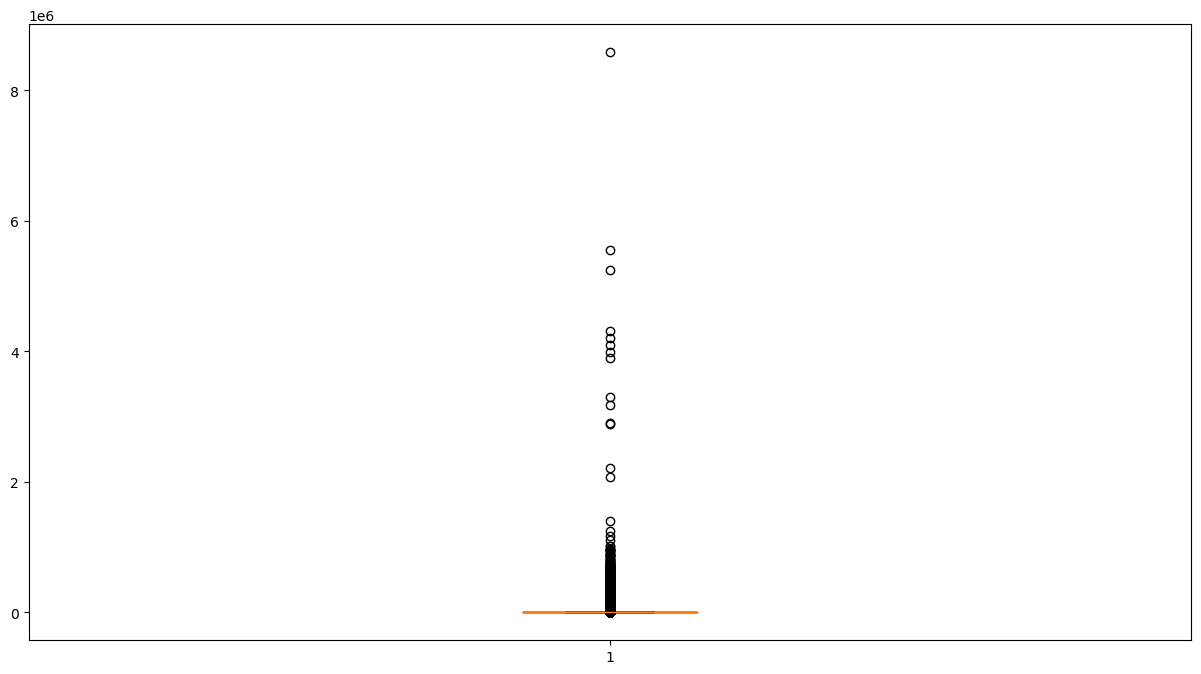

In [67]:
plot=plt.boxplot(crop_prod["Area"])

In [68]:
wiskers=[i.get_ydata() for i in plot["caps"]]
wiskers

[array([0.04, 0.04]), array([10986., 10986.])]

- The lower wiskers is equal to 0.04 and upper wiskers is equal to 10986
- Hence the data above 10986 and below 0.04 are outliers in columns "area".



In [69]:
crop_new1=crop_prod[(crop_prod['Area']<10986)&(crop_prod["Area"]>0.04)]

In [70]:
crop_new1.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop  Area  Production  
0             Arecanut  1254        2000  
1  Other Kharif pulses     2           1  
2                 Rice   102         321  
3               Banana   176         641  
4            Cashewnut   720         165

**Production**

- We check the outlier of the this column from new data set i.e crop_new1

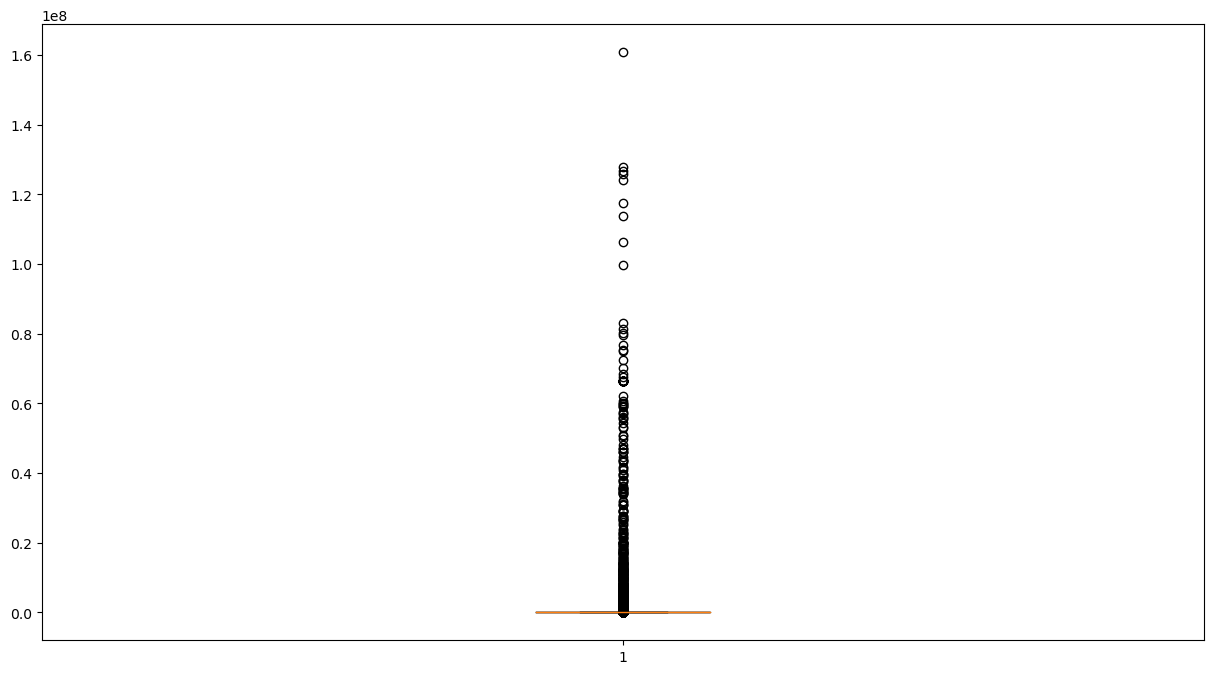

In [71]:
plot1=plt.boxplot(crop_new1["Production"])

In [72]:
wiskers2=[i.get_ydata() for i in plot1['caps']]
wiskers2

[array([0., 0.]), array([5543., 5543.])]

In [73]:
crop_new_2=crop_new1[(crop_new1["Production"]>0) & (crop_new1["Production"]<5543)]

In [74]:
crop_new_2.head()

State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop  Area  Production  
0             Arecanut  1254        2000  
1  Other Kharif pulses     2           1  
2                 Rice   102         321  
3               Banana   176         641  
4            Cashewnut   720         165

In [75]:
crop_new_2.shape

(172804, 7)

- The  dataframe 'crop_new_2' is the new dataframe after removing the oultier.
- Further we will perform the analysis on this new dataframe.


### Investigation of wrong datatype

In [77]:
# Check and visualize all data present in dataframe and investigate the wrong datatype.
crop_new_2.dtypes

State_Name        object
District_Name     object
Crop_Year        float64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

In [78]:
crop_new_2.Crop_Year.nunique()

19

- The column Crop_Year is a categorical columns   as it has only 19 unique values 
- Hence we will change the datatype into "object"

In [79]:
# Perform the Datatype Casting, If needed.
crop_new_2.Crop_Year=crop_new_2.Crop_Year.astype("object")

In [80]:
crop_new_2.Crop_Year.dtype

dtype('O')

### Check for the Duplicated in the dataset

In [84]:
# Show the duplicates here
crop_new_2.duplicated().sum()

1

In [85]:
# Remove the duplicates.
crop_new_2.drop_duplicates(inplace=True)

In [86]:
crop_new_2.duplicated().sum()

0

### Identifying the irrelevent columns in dataset:

In [87]:
#First let divide the categorical and numerical columns.
# Then we will check for the irrelevent columns
num_crop=crop_new_2.select_dtypes(np.number)
cat_crop=crop_new_2.select_dtypes(np.object)

In [88]:
num_crop.head()

Area  Production
0  1254        2000
1     2           1
2   102         321
3   176         641
4   720         165

In [89]:
cat_crop.head()

State_Name District_Name Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS      2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS      2000  Whole Year    

                  Crop  
0             Arecanut  
1  Other Kharif pulses  
2                 Rice  
3               Banana  
4            Cashewnut

In [90]:
# Visualize all columns at a time (Numerical columns and Categorical Columns).


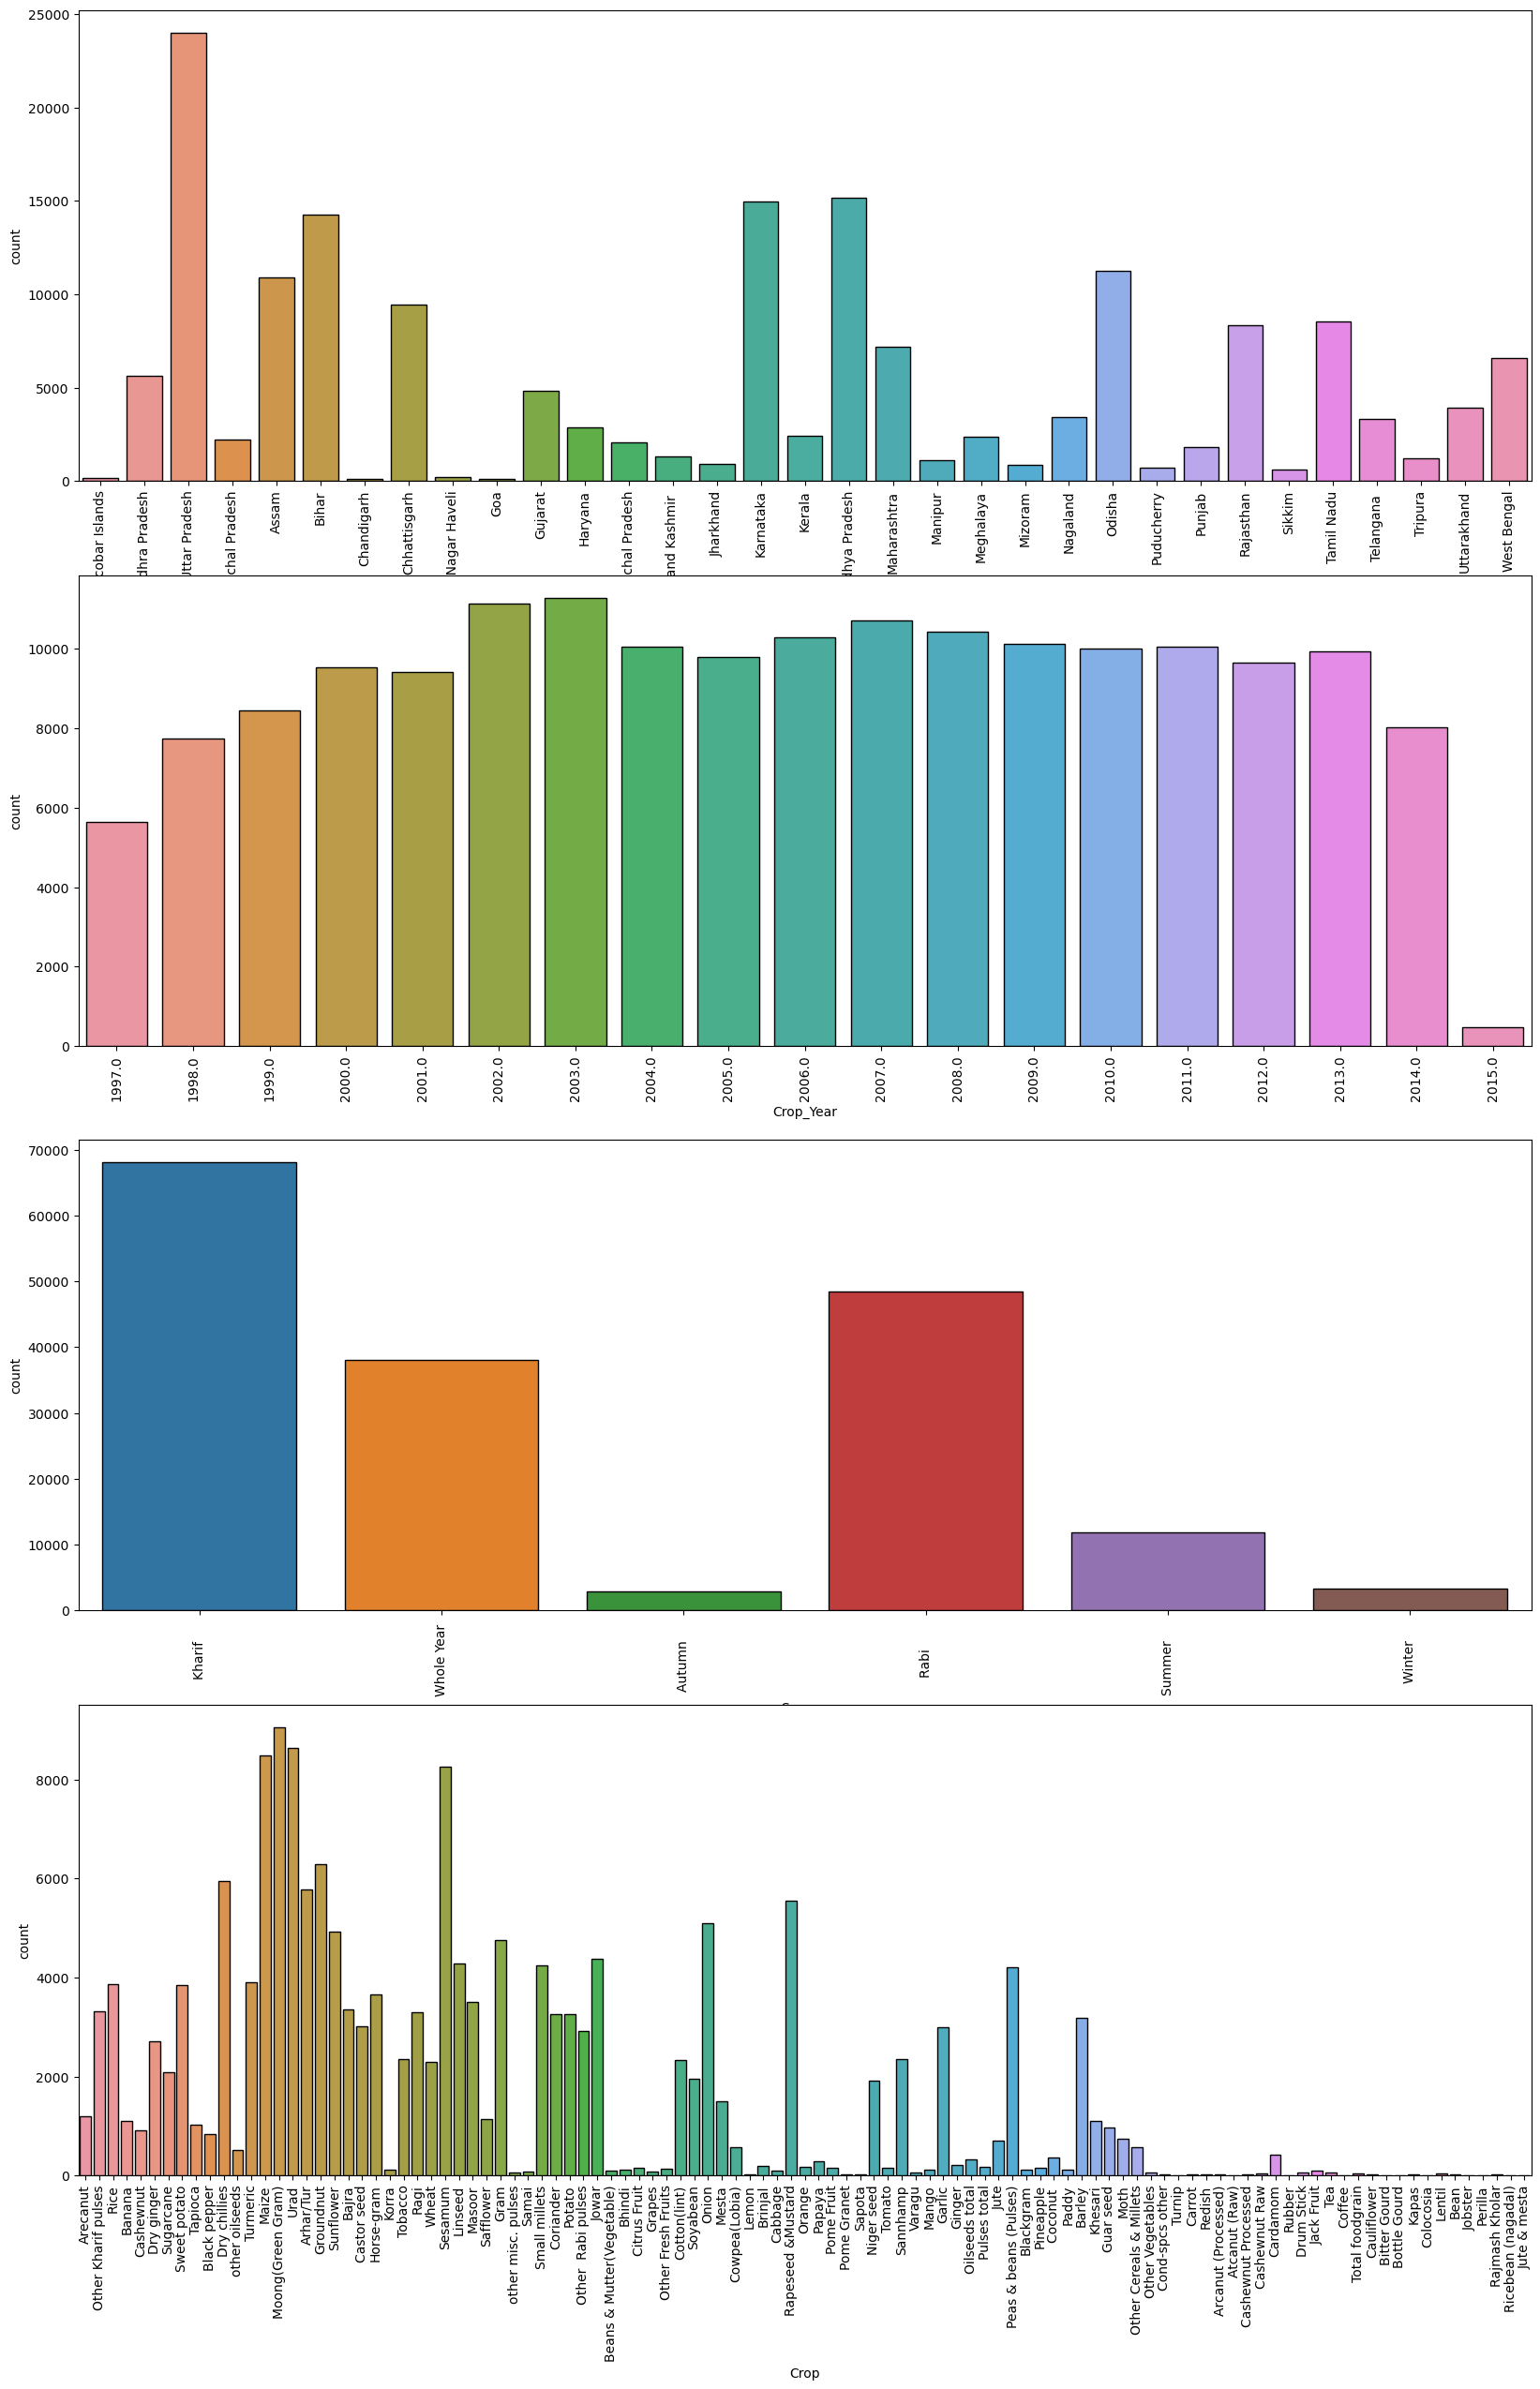

In [91]:
# Categorical Columns



plt.figure(figsize=(20,30))
num=1
for i in cat_crop.columns:
    
    if i != "District_Name":
    
        plt.subplot(4,1,num)

        sns.countplot(data=cat_crop, x=i, edgecolor='black')
        plt.xticks(rotation=90)
        num=num+1

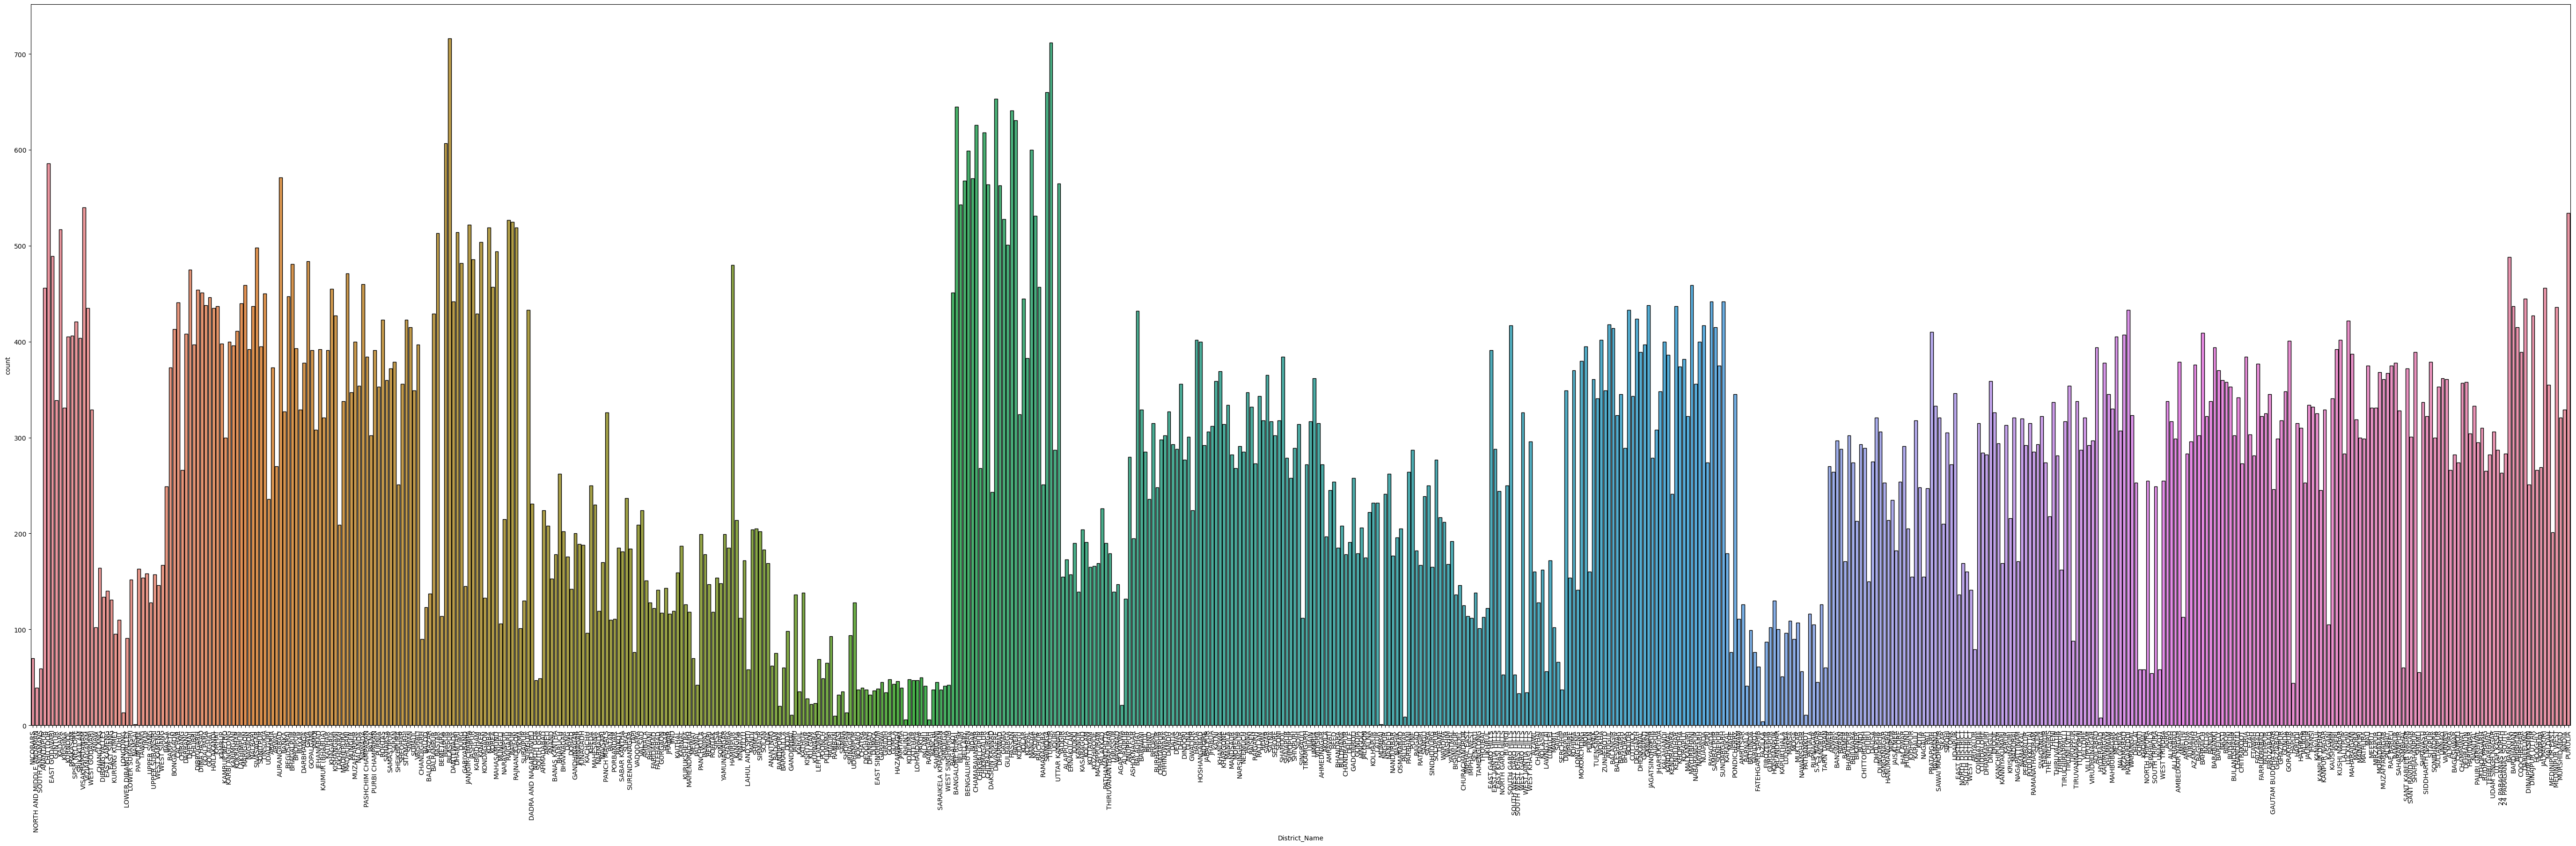

In [92]:
plt.figure(figsize=(70,20))

sns.countplot(data=cat_crop, x="District_Name", edgecolor="black")
plt.xticks(rotation=90)
plt.show()


- All the Categorical columns looks fine.


<AxesSubplot:xlabel='Production', ylabel='Count'>

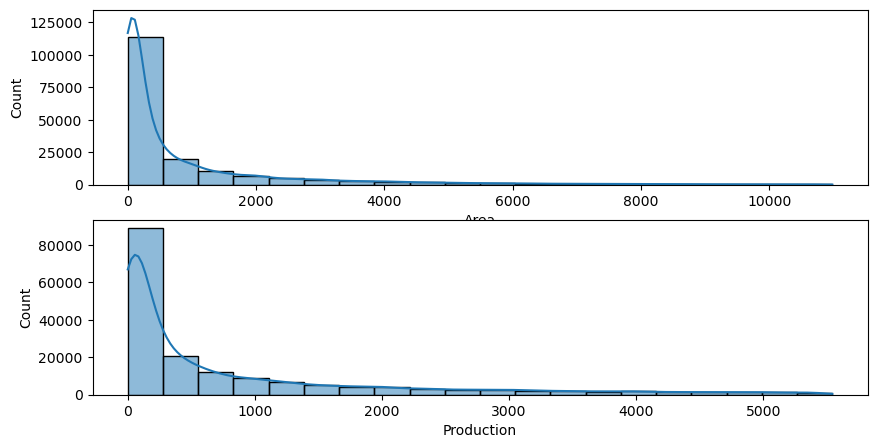

In [93]:
plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
sns.histplot(data=num_crop, x="Area", kde=True, bins=20)
plt.subplot(2,1,2)
sns.histplot(data=num_crop, x="Production", kde=True, bins=20)

- The numerical column-data is highly skeweed even after removing the outlier 
- But this two columns are important for our analysis.


- All the categorical and numerical columns are important for our analysis.
- Hence we will not remove the colums from the dataset

##  Univarate Analysis.

In [95]:
crop_new_2.State_Name.value_counts()

Uttar Pradesh                  23996
Madhya Pradesh                 15170
Karnataka                      14969
Bihar                          14238
Odisha                         11270
Assam                          10895
Chhattisgarh                    9442
Tamil Nadu                      8522
Rajasthan                       8328
Maharashtra                     7179
West Bengal                     6565
Andhra Pradesh                  5626
Gujarat                         4830
Uttarakhand                     3919
Nagaland                        3402
Telangana                       3330
Haryana                         2882
Kerala                          2435
Meghalaya                       2385
Arunachal Pradesh               2206
Himachal Pradesh                2067
Punjab                          1798
Jammu and Kashmir               1296
Tripura                         1240
Manipur                         1107
Jharkhand                        921
Mizoram                          883
P

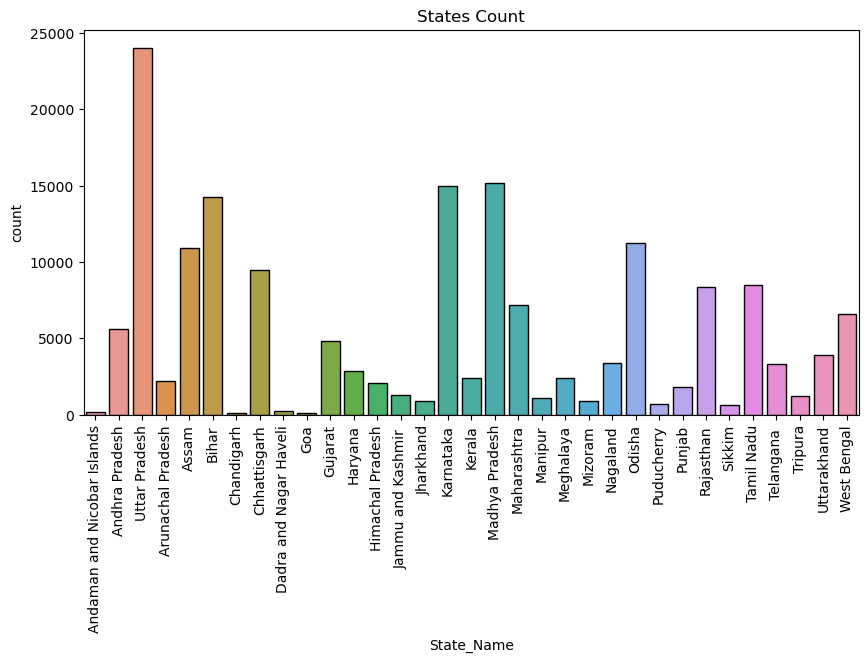

In [96]:
plt.figure(figsize=(10,5))

sns.countplot(data=crop_new_2, x="State_Name", edgecolor="black")

plt.title("States Count")
plt.xticks(rotation=90)
plt.show()

- Uttar Pradesh and Madhay Pradedh as highest count.
- The count for Goa and Chandigarh is lowest.


**District_Name**

In [97]:
crop_new_2.District_Name.value_counts()

BILASPUR                    716
TUMKUR                      712
SHIMOGA                     660
DAVANGERE                   653
BANGALORE RURAL             645
HASSAN                      641
HAVERI                      631
CHAMARAJANAGAR              626
CHIKMAGALUR                 618
BIJAPUR                     607
MANDYA                      600
BENGALURU URBAN             599
CHITTOOR                    586
AURANGABAD                  571
BIDAR                       570
BELLARY                     568
UTTAR KANNAD                565
CHITRADURGA                 564
DHARWAD                     563
BELGAUM                     543
VISAKHAPATANAM              540
PURULIA                     534
MYSORE                      531
GADAG                       528
RAIGARH                     527
RAIPUR                      525
JANJGIR-CHAMPA              522
KORBA                       519
RAJNANDGAON                 519
KADAPA                      517
DHAMTARI                    514
BASTAR  

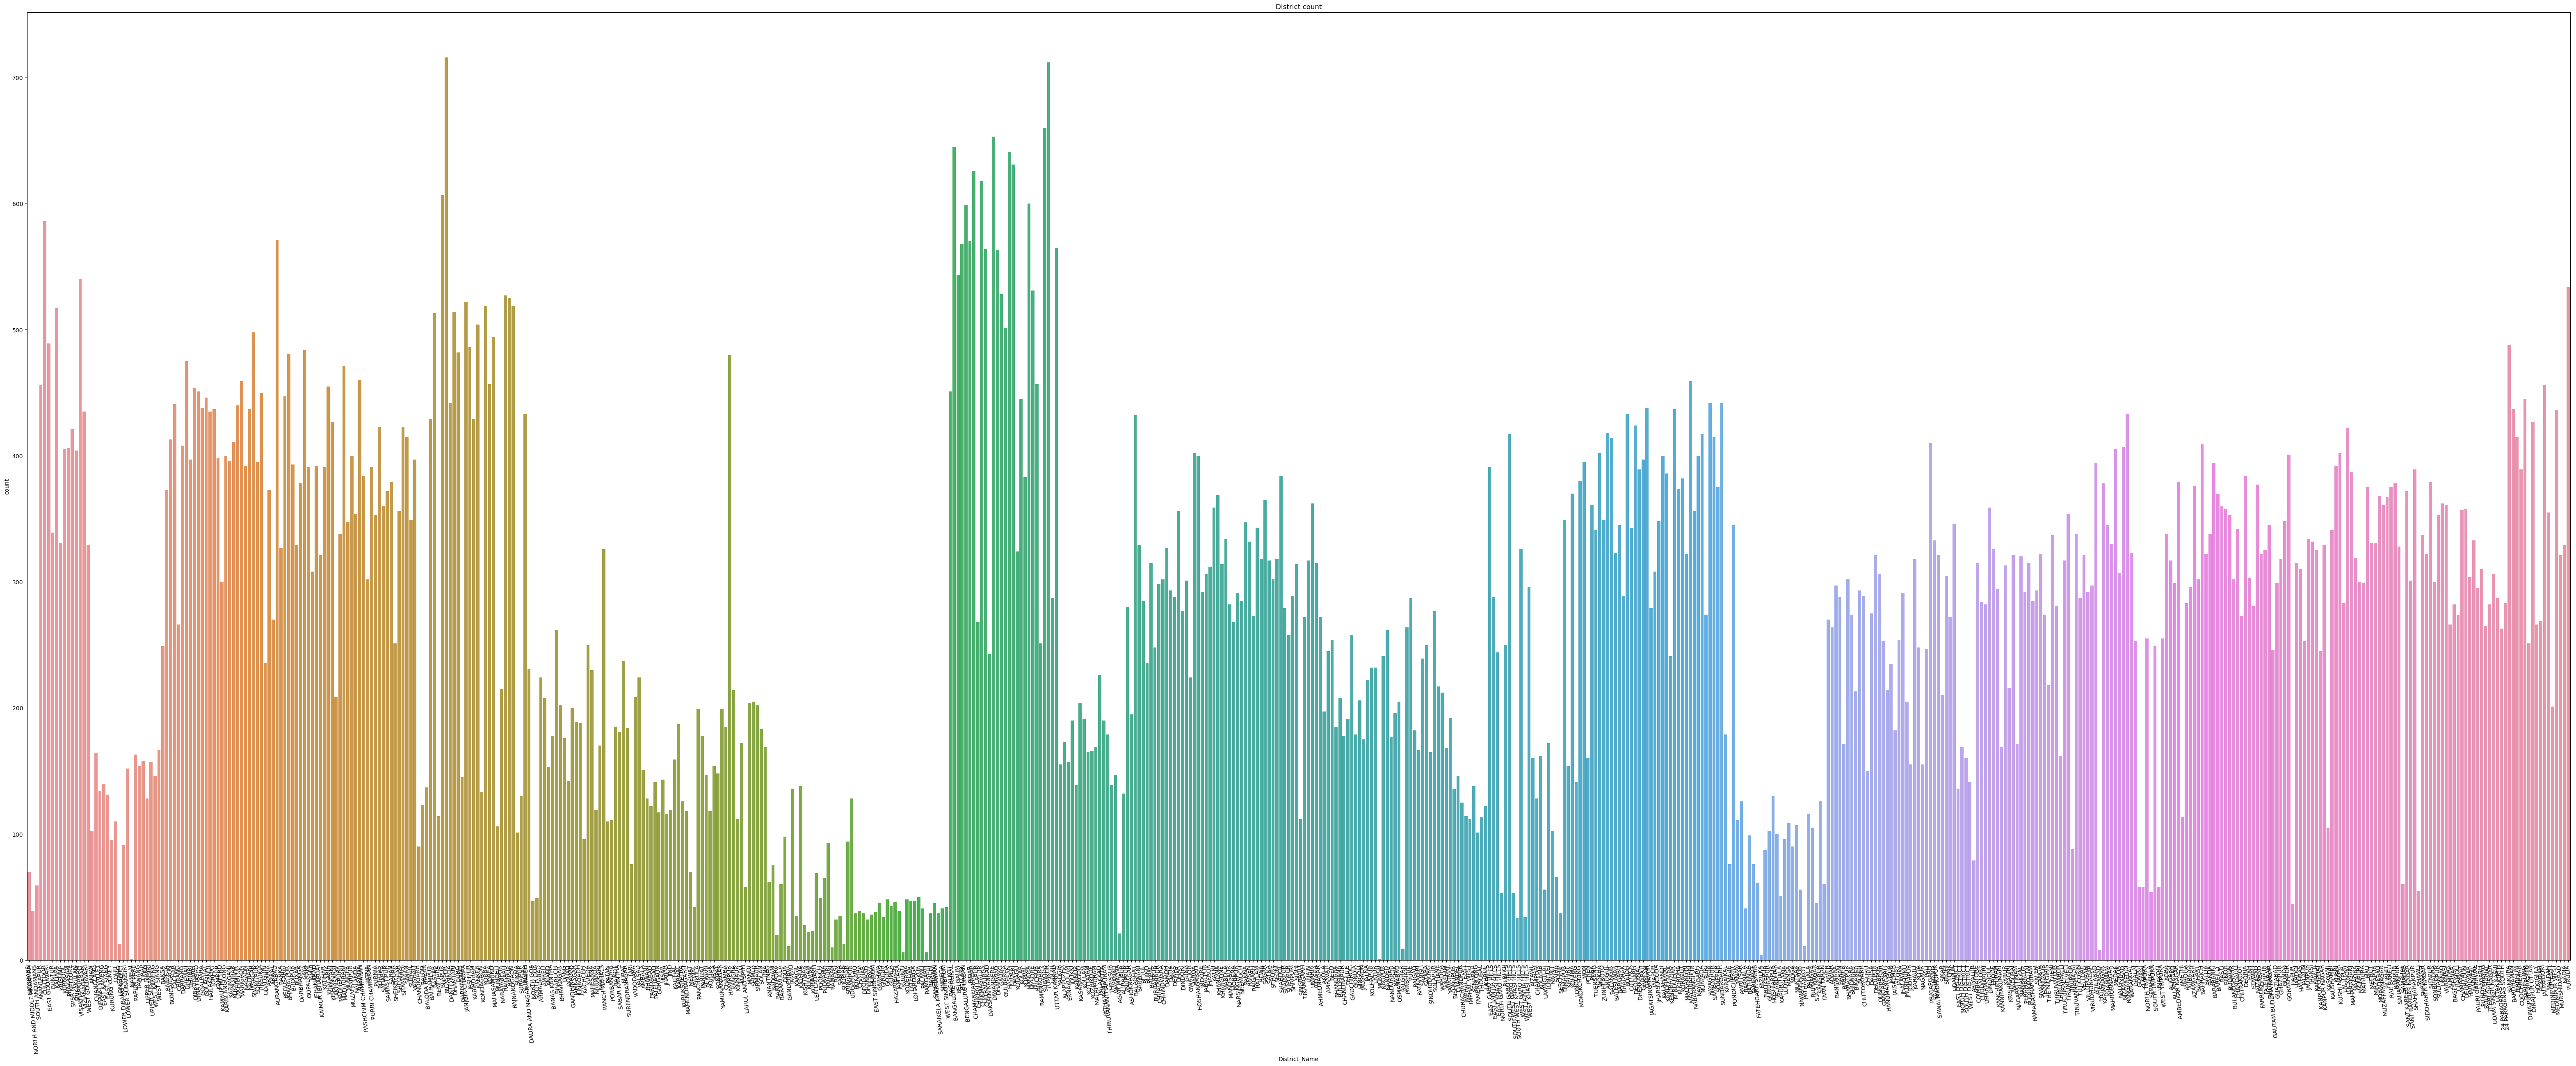

In [98]:
plt.figure(figsize=(80,30))


sns.countplot(data=crop_new_2, x="District_Name")
plt.title("District count", fontdict={"size":12, "color":"black"})
plt.xticks(rotation=95)
plt.show()

- The above graph does not gives any clear picture. 
- Hence to get a clear picture we will look at top 10 and bottom 10 district count.


In [99]:
count_dict=crop_new_2.District_Name.value_counts()

count_dict

BILASPUR                    716
TUMKUR                      712
SHIMOGA                     660
DAVANGERE                   653
BANGALORE RURAL             645
HASSAN                      641
HAVERI                      631
CHAMARAJANAGAR              626
CHIKMAGALUR                 618
BIJAPUR                     607
MANDYA                      600
BENGALURU URBAN             599
CHITTOOR                    586
AURANGABAD                  571
BIDAR                       570
BELLARY                     568
UTTAR KANNAD                565
CHITRADURGA                 564
DHARWAD                     563
BELGAUM                     543
VISAKHAPATANAM              540
PURULIA                     534
MYSORE                      531
GADAG                       528
RAIGARH                     527
RAIPUR                      525
JANJGIR-CHAMPA              522
KORBA                       519
RAJNANDGAON                 519
KADAPA                      517
DHAMTARI                    514
BASTAR  

In [100]:
top10=count_dict[:11]
top10

BILASPUR           716
TUMKUR             712
SHIMOGA            660
DAVANGERE          653
BANGALORE RURAL    645
HASSAN             641
HAVERI             631
CHAMARAJANAGAR     626
CHIKMAGALUR        618
BIJAPUR            607
MANDYA             600
Name: District_Name, dtype: int64

In [101]:
bottom10=count_dict[-11:-1]
bottom10

LONGDING     13
GANDERBAL    11
PATHANKOT    11
RAMBAN       10
PALGHAR       9
HYDERABAD     8
RAMGARH       6
KHUNTI        6
FAZILKA       4
NAMSAI        1
Name: District_Name, dtype: int64

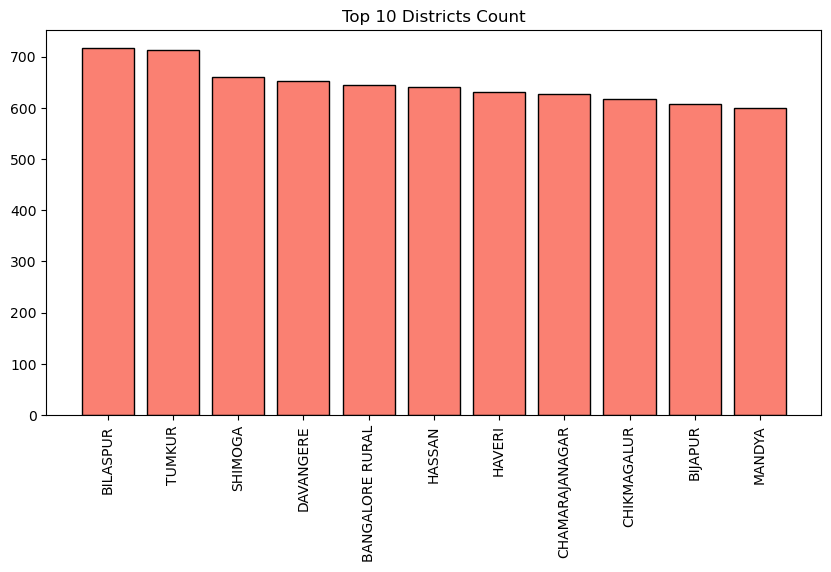

In [102]:
#For Top10 district:
plt.figure(figsize=(10,5))
plt.bar(top10.keys(), top10.values, color="salmon", edgecolor="black")

plt.title("Top 10 Districts Count", fontdict={"size":12})
plt.xticks(rotation=90)
plt.show()

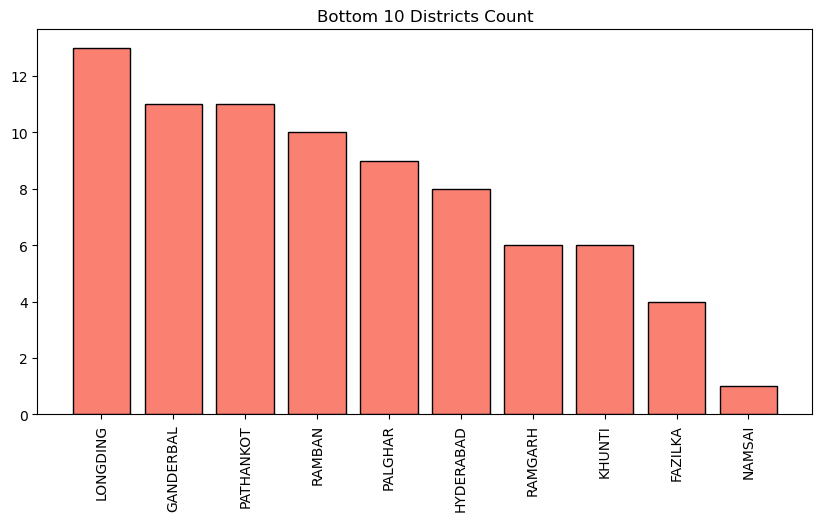

In [103]:
#For Bottom10 district:
plt.figure(figsize=(10,5))
plt.bar(bottom10.keys(), bottom10.values, color="salmon", edgecolor="black")

plt.title("Bottom 10 Districts Count", fontdict={"size":12})
plt.xticks(rotation=90)
plt.show()

- The District Bilaspur has maximum count, i.e it has maximum crop production.
- Namsai has lowest count, i.e it has lowest crop production.


**Crop_Year**

In [104]:
crop_new_2.Crop_Year.value_counts()

2003    11295
2002    11146
2007    10721
2008    10441
2006    10288
2009    10119
2011    10066
2004    10051
2010    10004
2013     9939
2005     9796
2012     9647
2000     9534
2001     9420
1999     8455
2014     8030
1998     7748
1997     5636
2015      467
Name: Crop_Year, dtype: int64

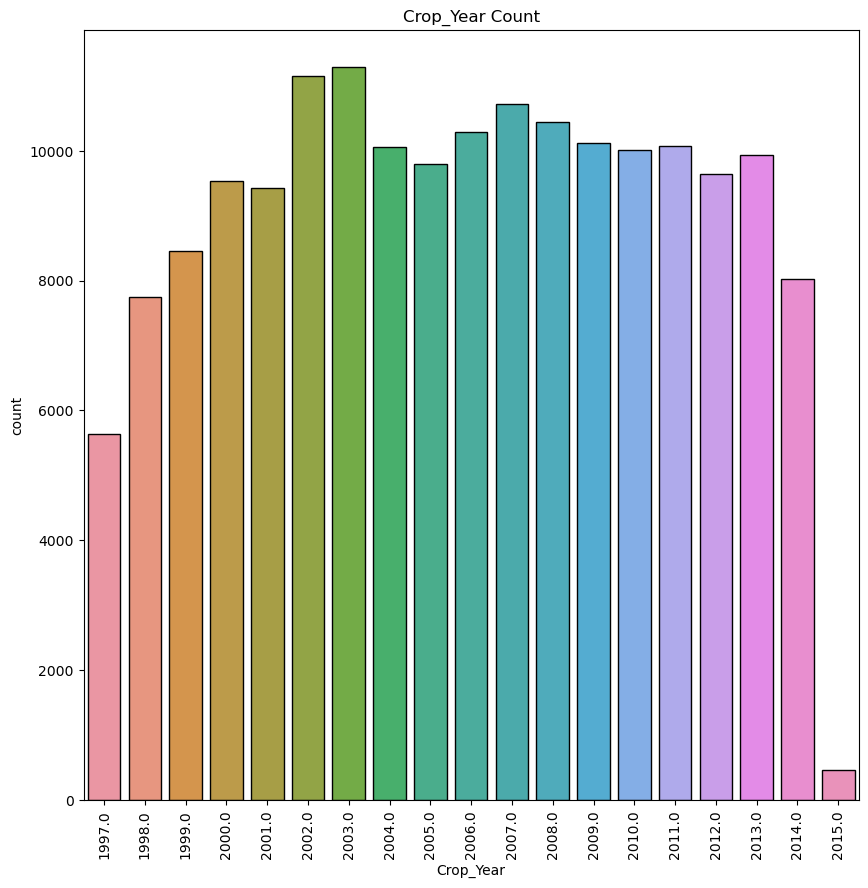

In [105]:
plt.figure(figsize=(10,10))

sns.countplot(data=crop_new_2, x="Crop_Year", edgecolor="black")
plt.title("Crop_Year Count")

plt.xticks(rotation=90)

plt.show()

- The Year 2003 and 2004 has maximum count
- The Year 2015 have lowest count.

**Season**

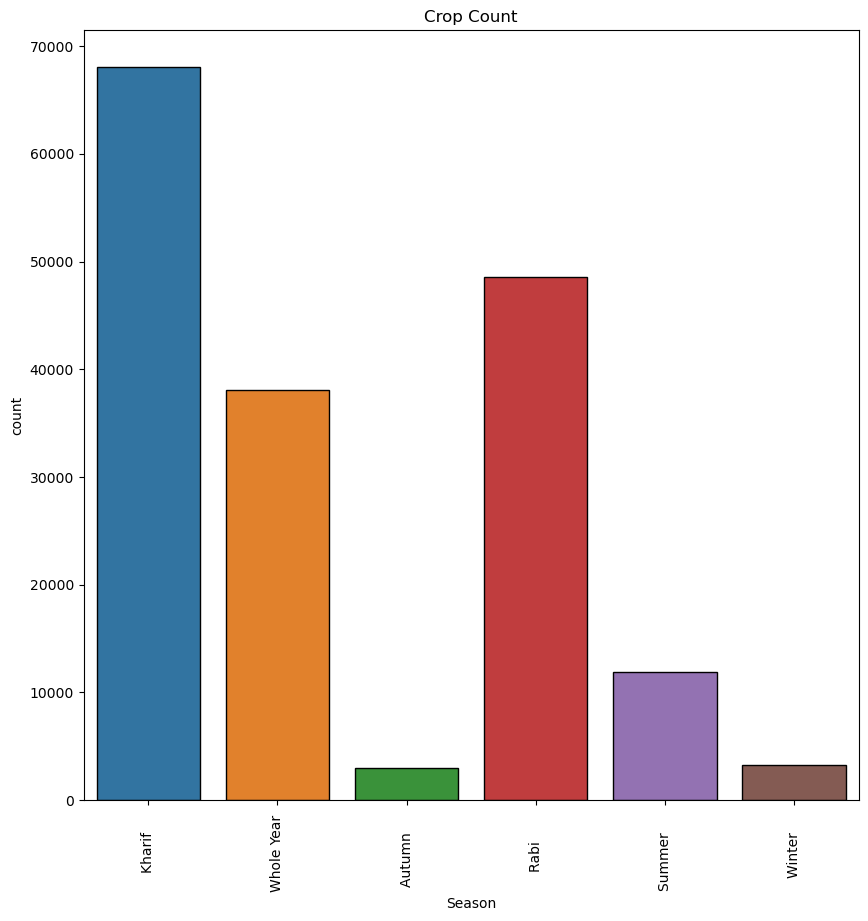

In [106]:
plt.figure(figsize=(10,10))

sns.countplot(data=crop_new_2, x="Season", edgecolor="black")
plt.title("Crop Count")

plt.xticks(rotation=90)

plt.show()

- The Kharif Season have maximum count.
- The Autumn Season has minimum count.

**Crop**

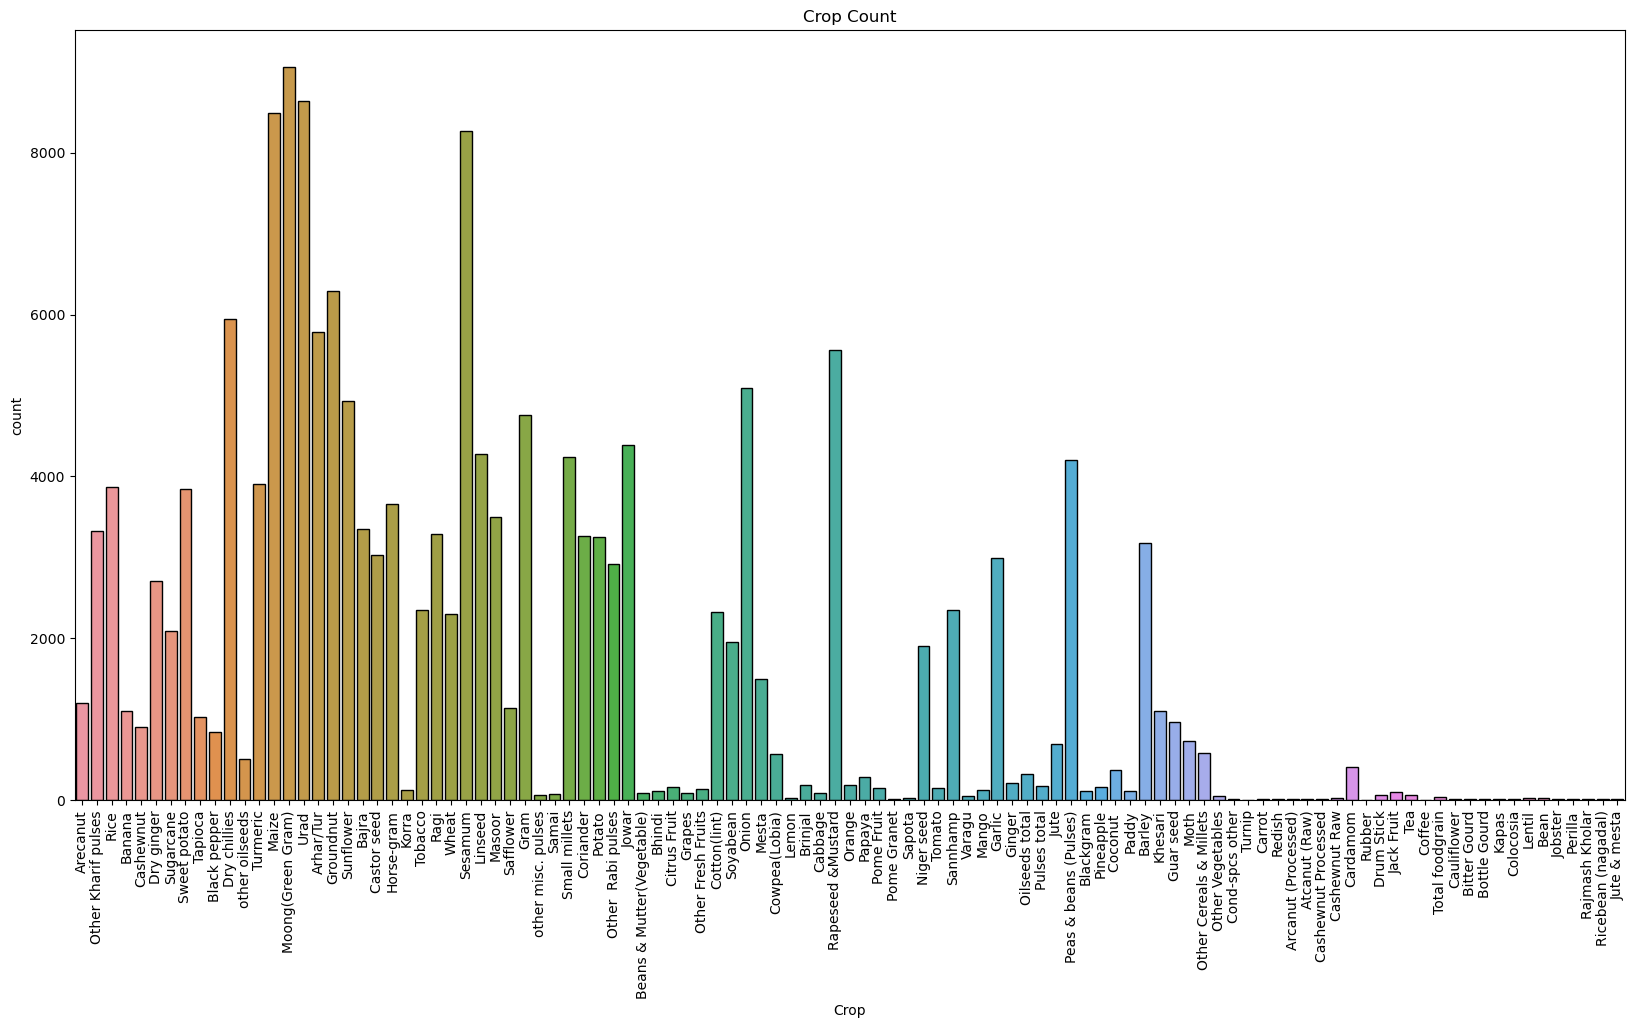

In [107]:
plt.figure(figsize=(20,10))

sns.countplot(data=crop_new_2, x="Crop", edgecolor="black")
plt.title("Crop Count")

plt.xticks(rotation=90)

plt.show()

- Here also to get clear picture we will find top 10 and bottom 10 crop count

In [108]:
top10_crop=crop_new_2.Crop.value_counts()[0:11]

bottom_crop=crop_new_2.Crop.value_counts()[-11:-1]

In [109]:
top10_crop

Moong(Green Gram)    9062
Urad                 8636
Maize                8496
Sesamum              8271
Groundnut            6295
Dry chillies         5946
Arhar/Tur            5782
Rapeseed &Mustard    5557
Onion                5095
Sunflower            4929
Gram                 4760
Name: Crop, dtype: int64

In [110]:
bottom_crop

Bottle Gourd          11
Bitter Gourd          10
Ricebean (nagadal)    10
Colocosia              9
Jobster                9
Perilla                9
Atcanut (Raw)          9
Jute & mesta           8
Turnip                 6
Rubber                 5
Name: Crop, dtype: int64

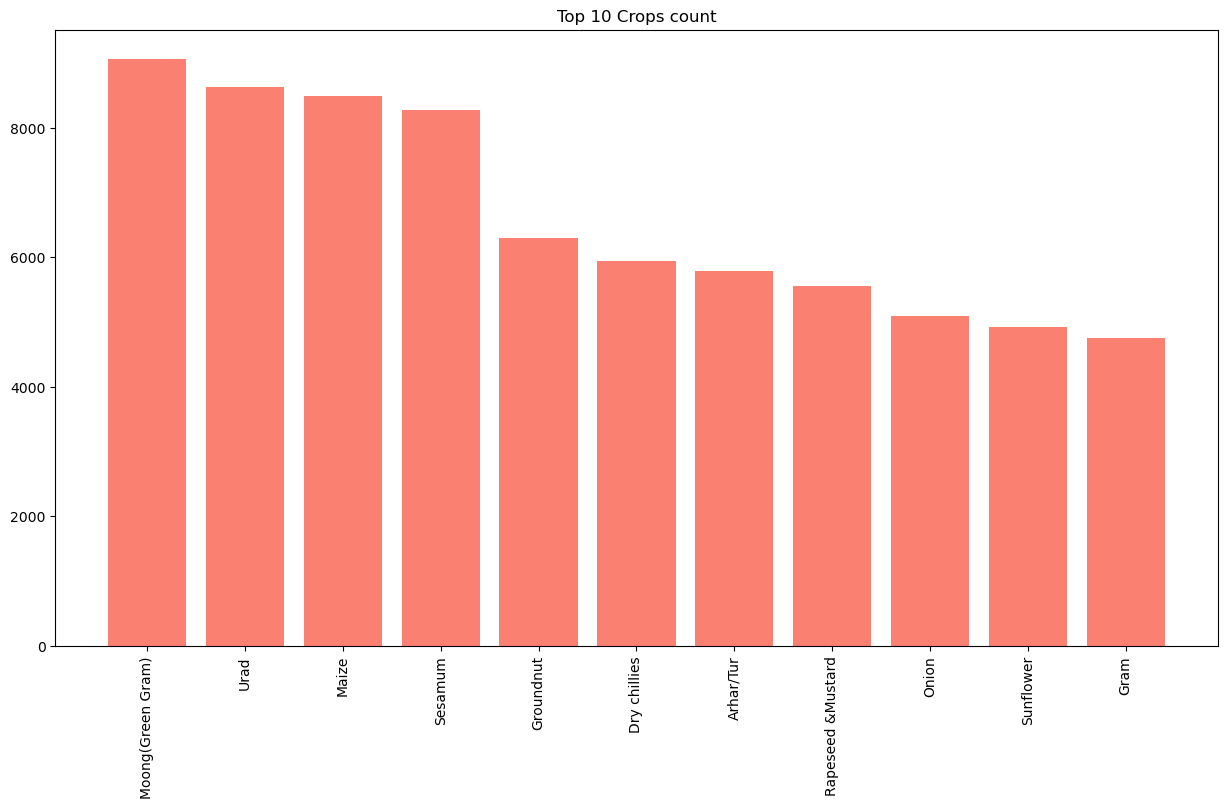

In [111]:
#Top 10 Crops:
plt.bar(top10_crop.keys(), top10_crop.values, color="salmon")
plt.title("Top 10 Crops count", fontdict={"size":12})
plt.xticks(rotation=90)
plt.show()

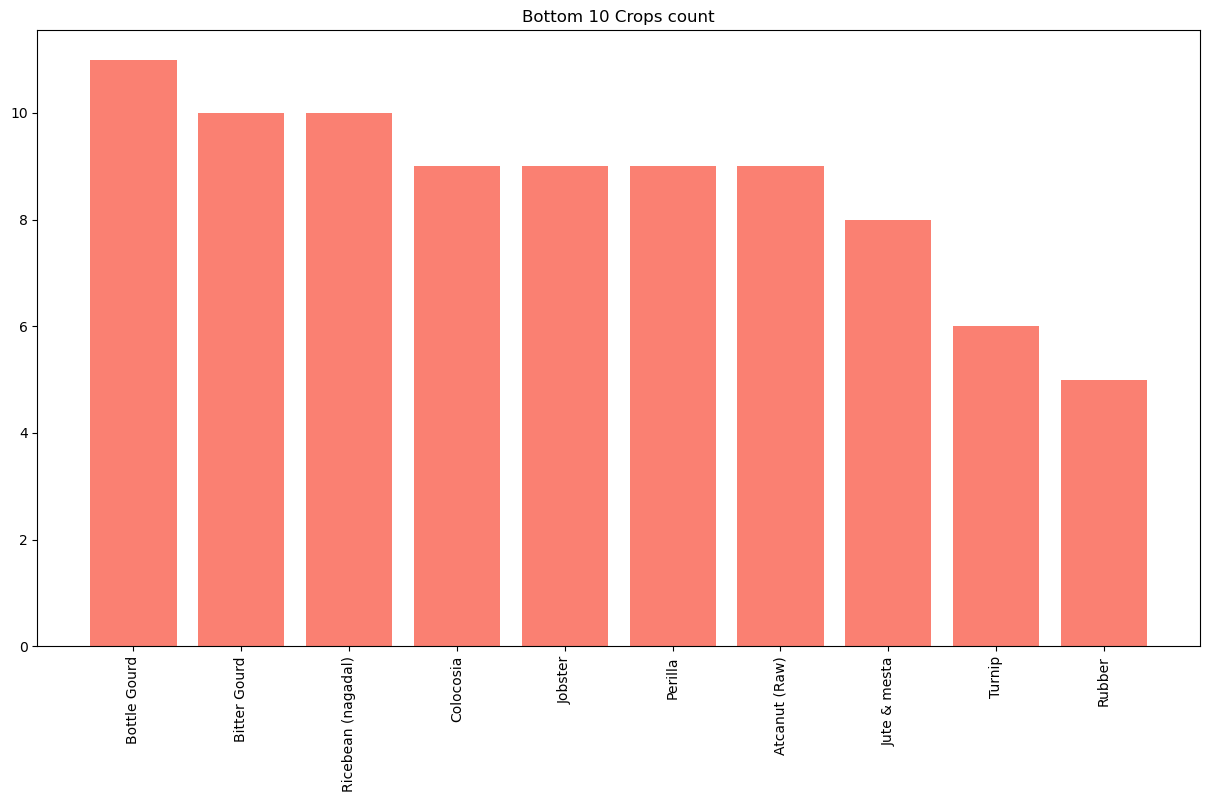

In [112]:
#Top 10 Crops:
plt.bar(bottom_crop.keys(), bottom_crop.values, color="salmon")
plt.title("Bottom 10 Crops count", fontdict={"size":12})
plt.xticks(rotation=90)
plt.show()

- Moong(Green Grams) has maximum count.
- Rubber has lowest count.

In [113]:
crop_new_2.head()

State_Name District_Name Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS      2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS      2000  Whole Year    

                  Crop  Area  Production  
0             Arecanut  1254        2000  
1  Other Kharif pulses     2           1  
2                 Rice   102         321  
3               Banana   176         641  
4            Cashewnut   720         165

**Area**

<AxesSubplot:xlabel='Area', ylabel='Count'>

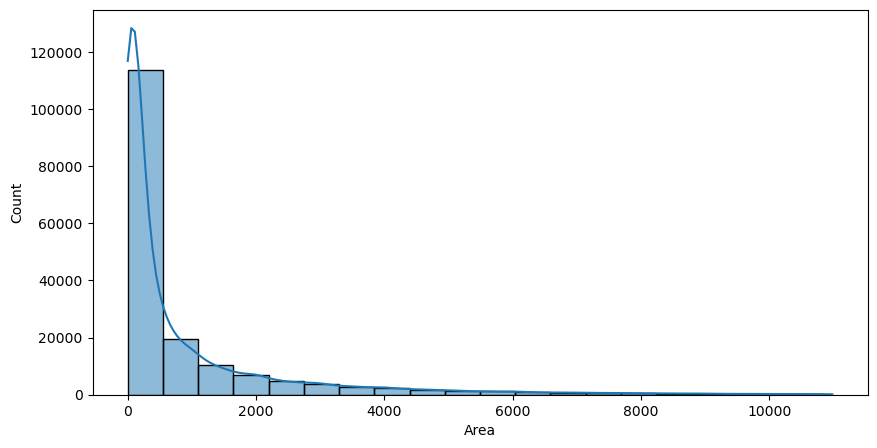

In [114]:
plt.figure(figsize=(10,5))

sns.histplot(data=crop_new_2, x="Area", kde=True, bins=20)

- The data is highly skweed .
- This is maybe beacuse that every state has varying number of agricultural land.


**Production**

<AxesSubplot:xlabel='Production', ylabel='Count'>

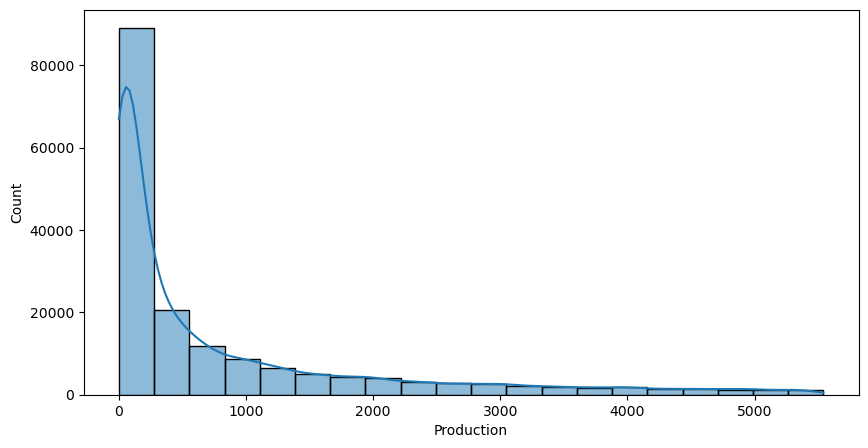

In [115]:
plt.figure(figsize=(10,5))

sns.histplot(data=crop_new_2, x="Production", kde=True, bins=20)

- The data is highly skweed .
- This is maybe beacuse that every state has varying number of agricultural land.
- Every State produce diffrent crops in abundance.

### **Bivariate Analysis**

In [116]:
crop_new_2.head()

State_Name District_Name Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS      2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS      2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS      2000  Whole Year    

                  Crop  Area  Production  
0             Arecanut  1254        2000  
1  Other Kharif pulses     2           1  
2                 Rice   102         321  
3               Banana   176         641  
4            Cashewnut   720         165

**States_Name v/s Area**

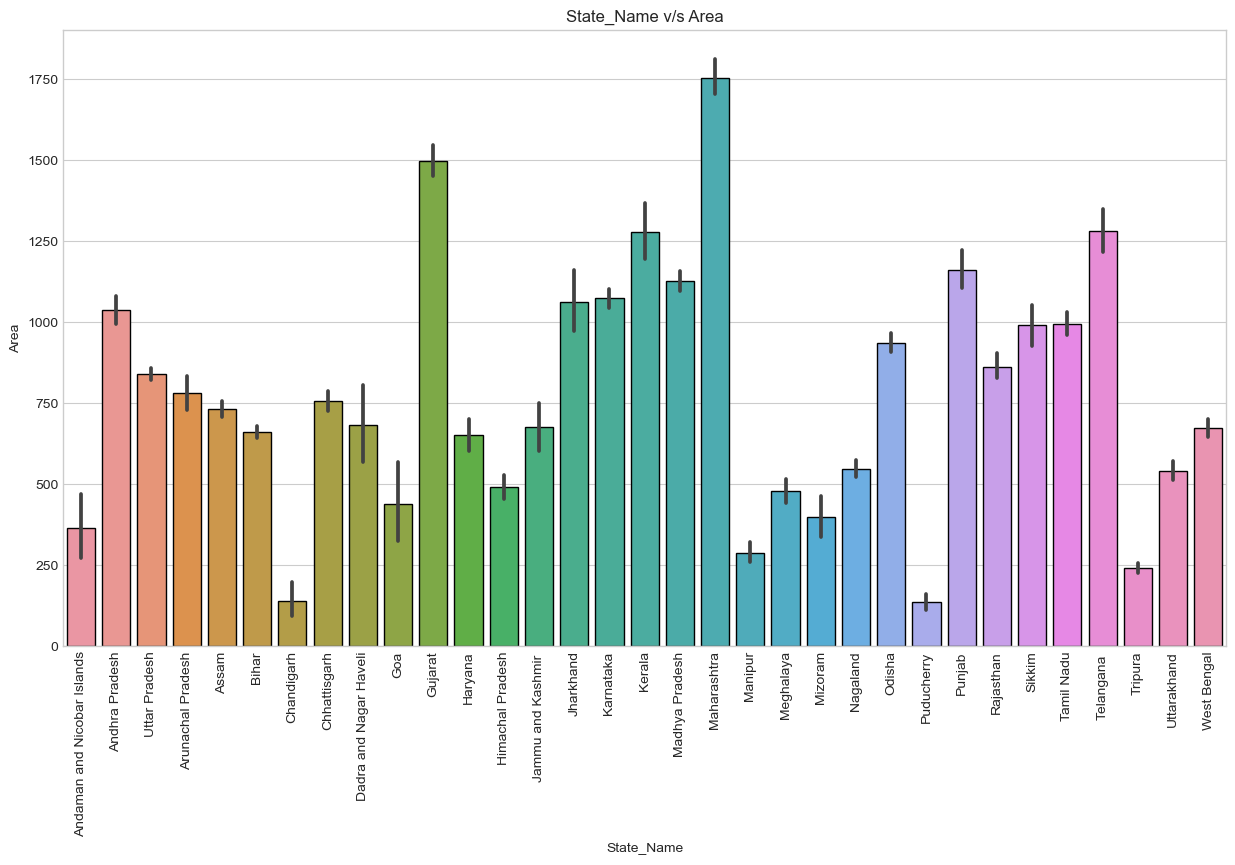

In [117]:
plt.style.use("seaborn-whitegrid")
sns.barplot(data=crop_new_2, x='State_Name', y='Area', edgecolor="black")
plt.title("State_Name v/s Area")
plt.xticks(rotation= 90 )
plt.show()


- The States Punjab, Sikkim, Gujarat has maximumn number of Agricutural land among all the states
- Chandigarh has lowest number of agricultural land.

**Crop_Year v/s Production**

Text(0.5, 1.0, 'Crop_Year v/s Production')

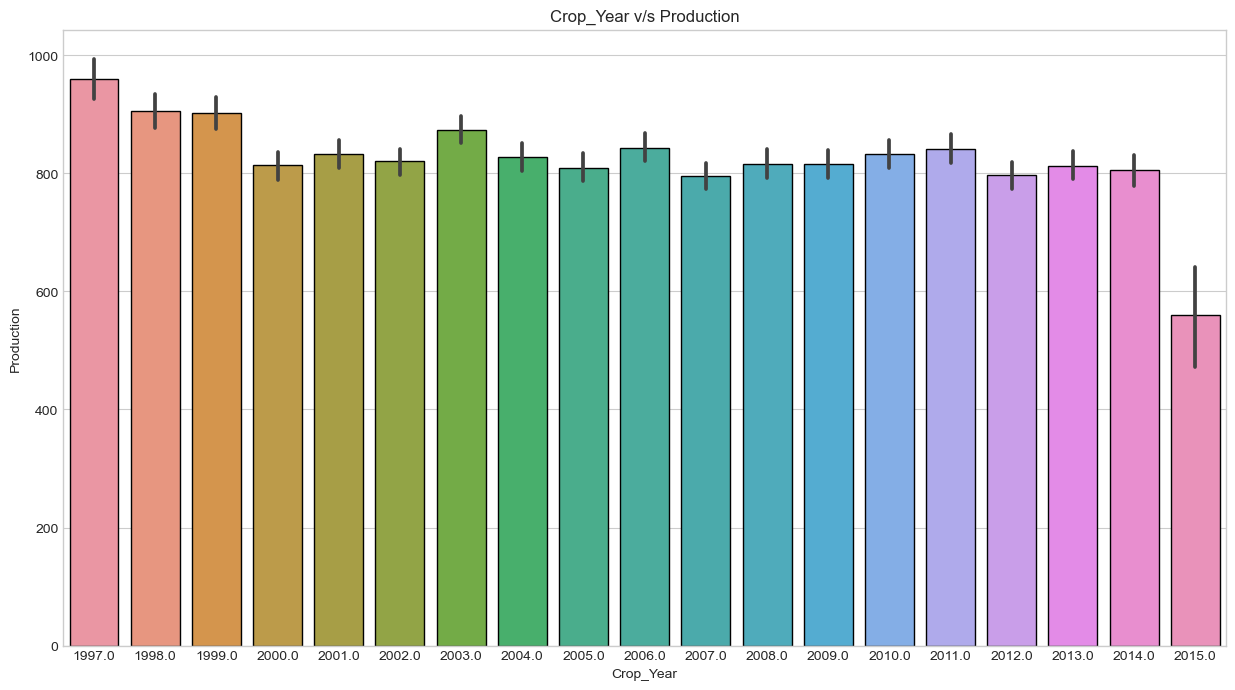

In [118]:
sns.barplot(data=crop_new_2, x="Crop_Year", y="Production", edgecolor="black")
plt.title("Crop_Year v/s Production")

- Since 1997 there isn't any much diffrence in Crop Production.
- Except 2015 has lowest crop production.

**Crop_Year v/s Area**

Text(0.5, 1.0, 'Crop_Year v/s Area')

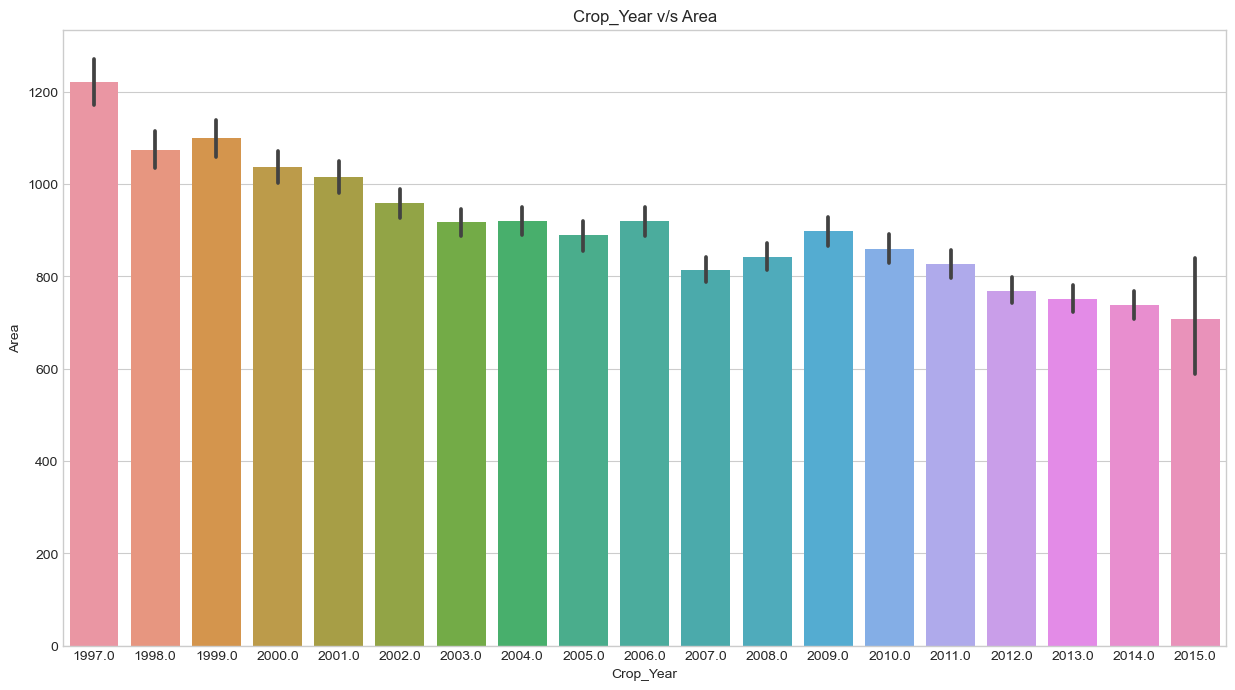

In [119]:
sns.barplot(data=crop_new_2, x="Crop_Year", y="Area")
plt.title("Crop_Year v/s Area")

- From 1997 to 2015 there is a decrease in agricultral area.


**Season v/s Area**

Text(0.5, 1.0, 'Season v/s Area')

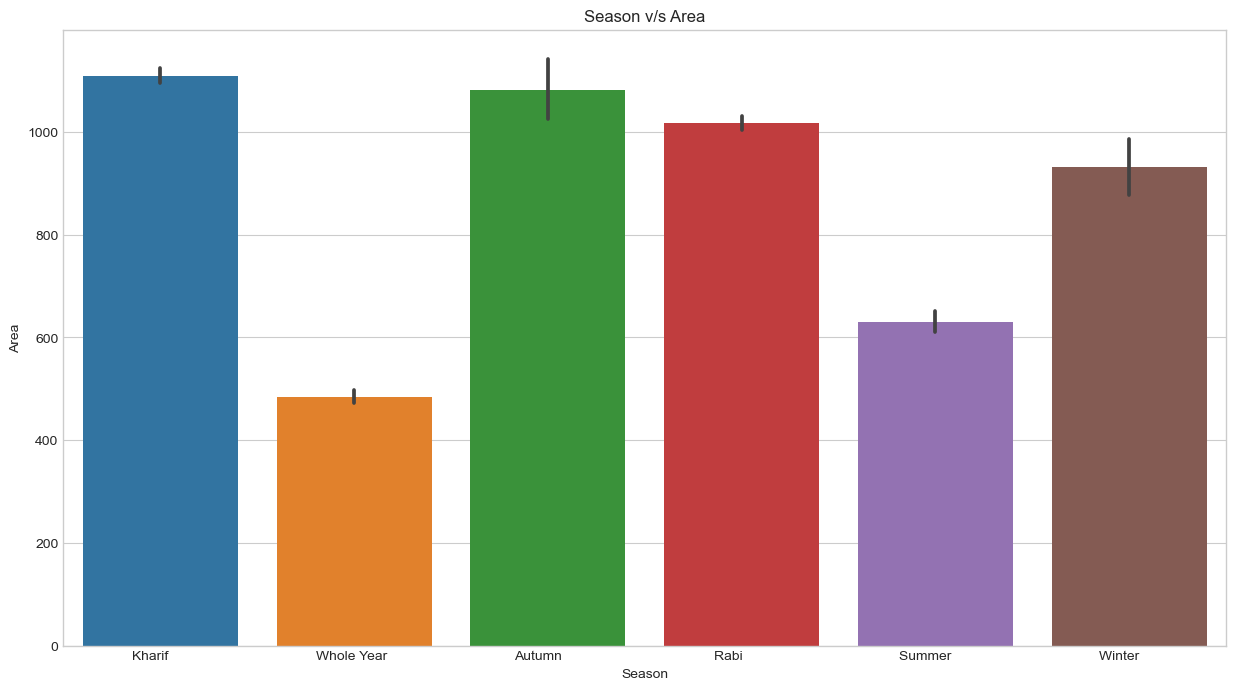

In [120]:
sns.barplot(data=crop_new_2, x="Season", y="Area")
plt.title("Season v/s Area")

- The agricultural area is Maximum in "Autumn"

**Season v/s Production**

Text(0.5, 1.0, 'Season v/s Production')

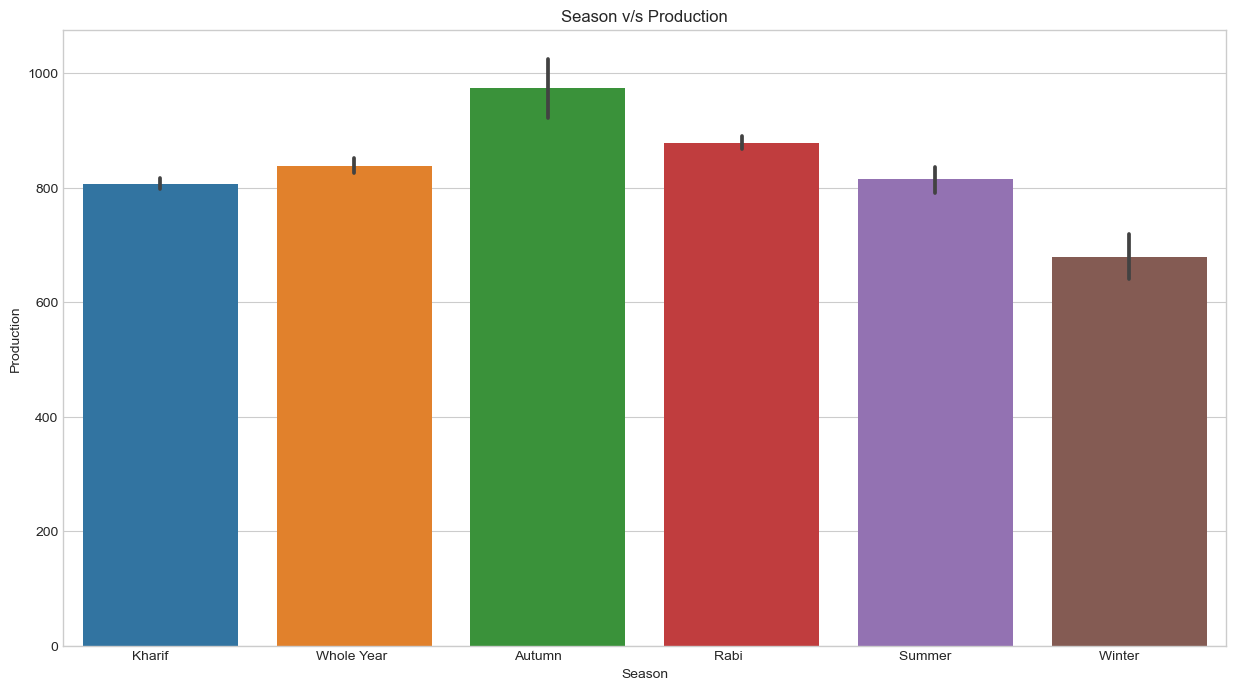

In [121]:
sns.barplot(data=crop_new_2, x="Season", y="Production")
plt.title("Season v/s Production")

- The Production area is Maximum in "Autumn"

**Crop v/s Production**

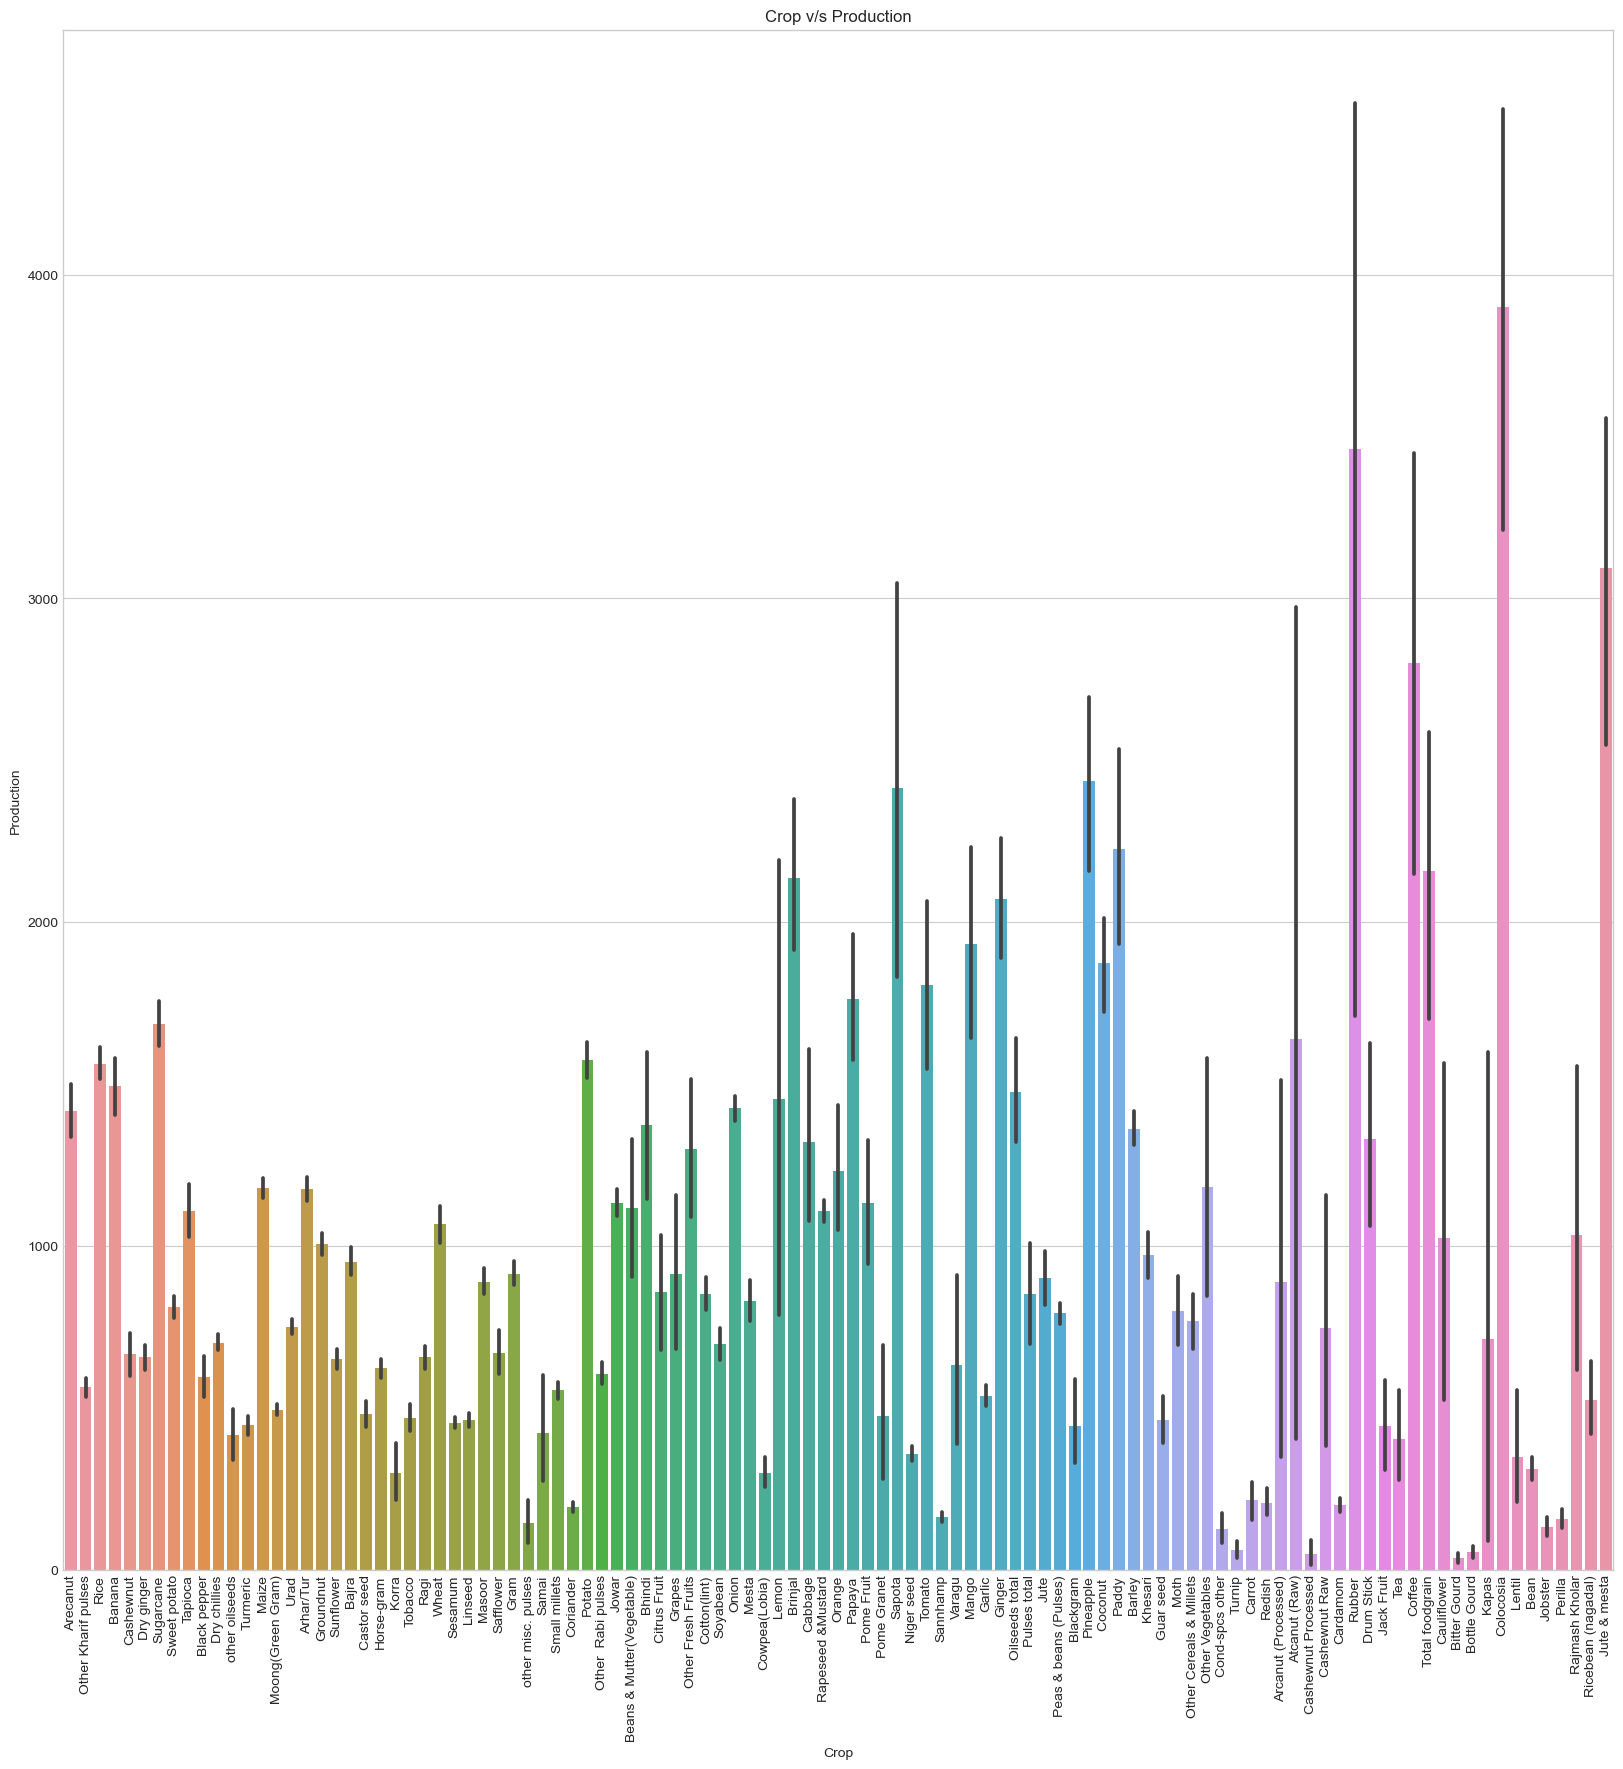

In [122]:
plt.figure(figsize=(20,20))
sns.barplot(data=crop_new_2, x="Crop", y="Production")
plt.title("Crop v/s Production")
plt.xticks(rotation=90)
plt.show()

- The production of colcosisia is done in maximum.


**Crop v/s Area**

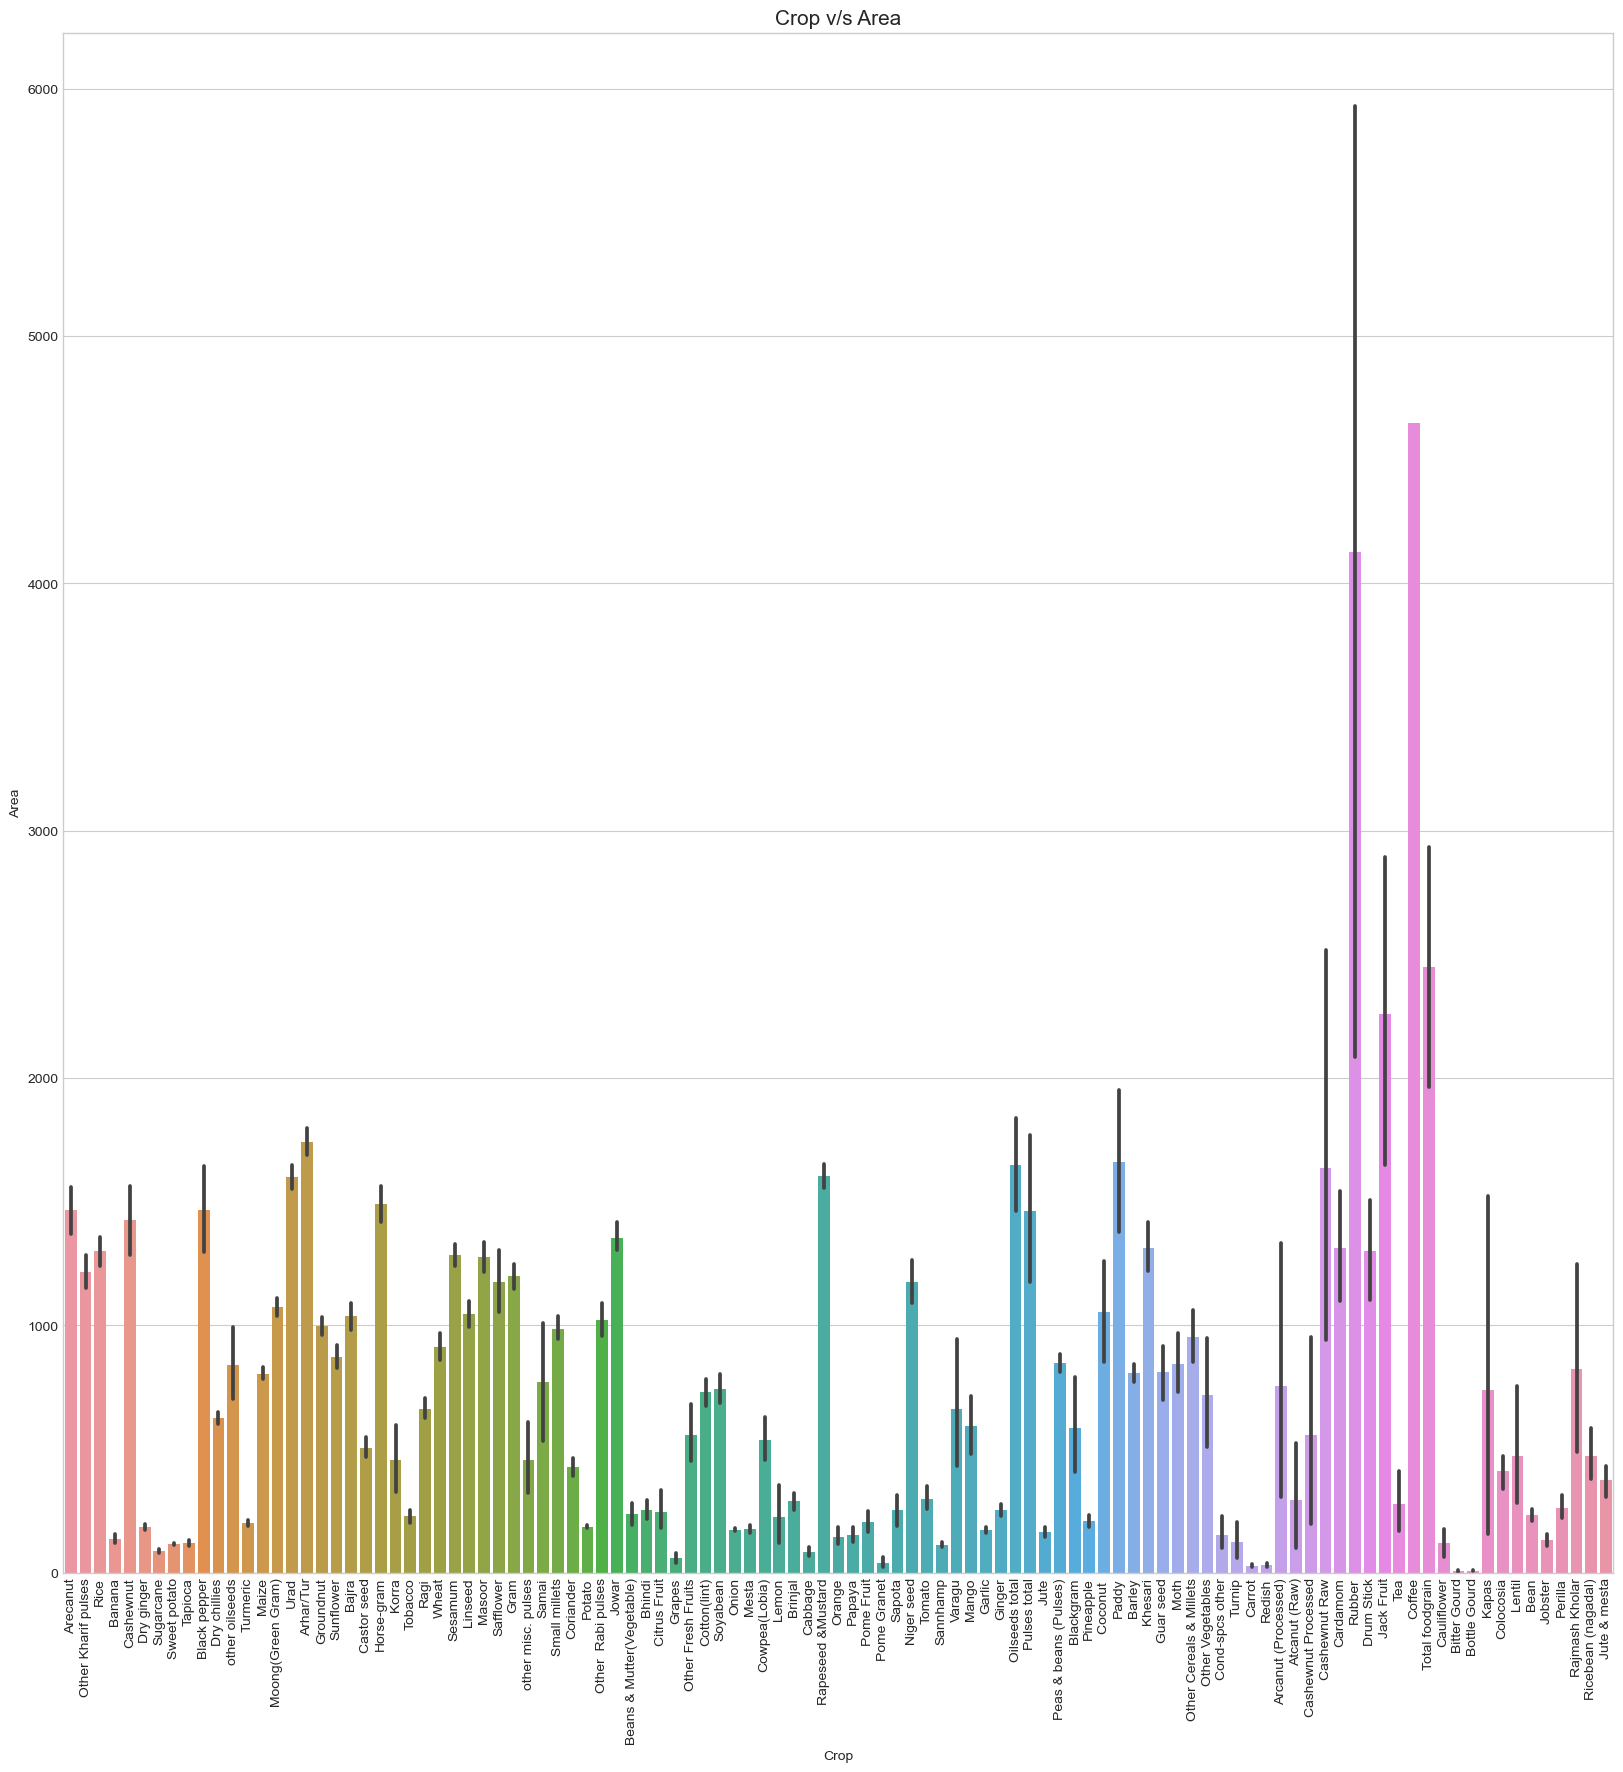

In [123]:
plt.figure(figsize=(20,20))
sns.barplot(data=crop_new_2, x="Crop", y="Area")
plt.title("Crop v/s Area", fontdict={"size":15})
plt.xticks(rotation=90)
plt.show()

- Area for total food-grains is maximum.

**Production v/s Area**

<AxesSubplot:xlabel='Production', ylabel='Area'>

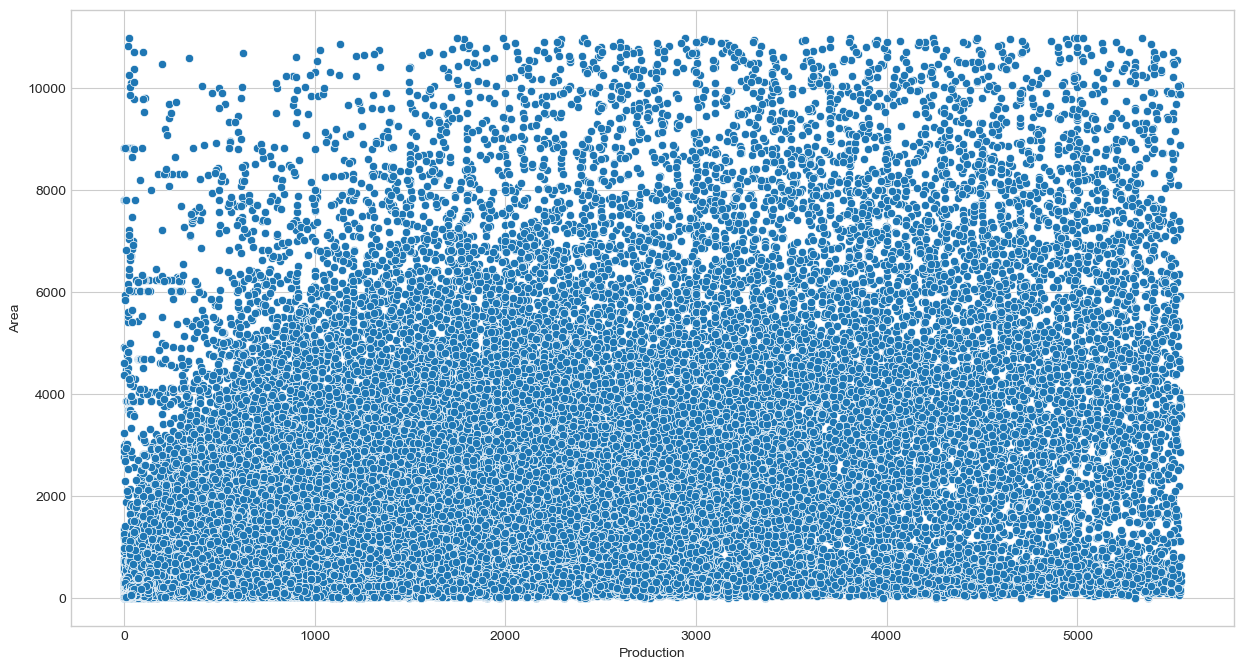

In [124]:
sns.scatterplot(data=crop_new_2, x="Production", y="Area")

- Production is corretated with agricultural area

**Season-vise Yearly Production**

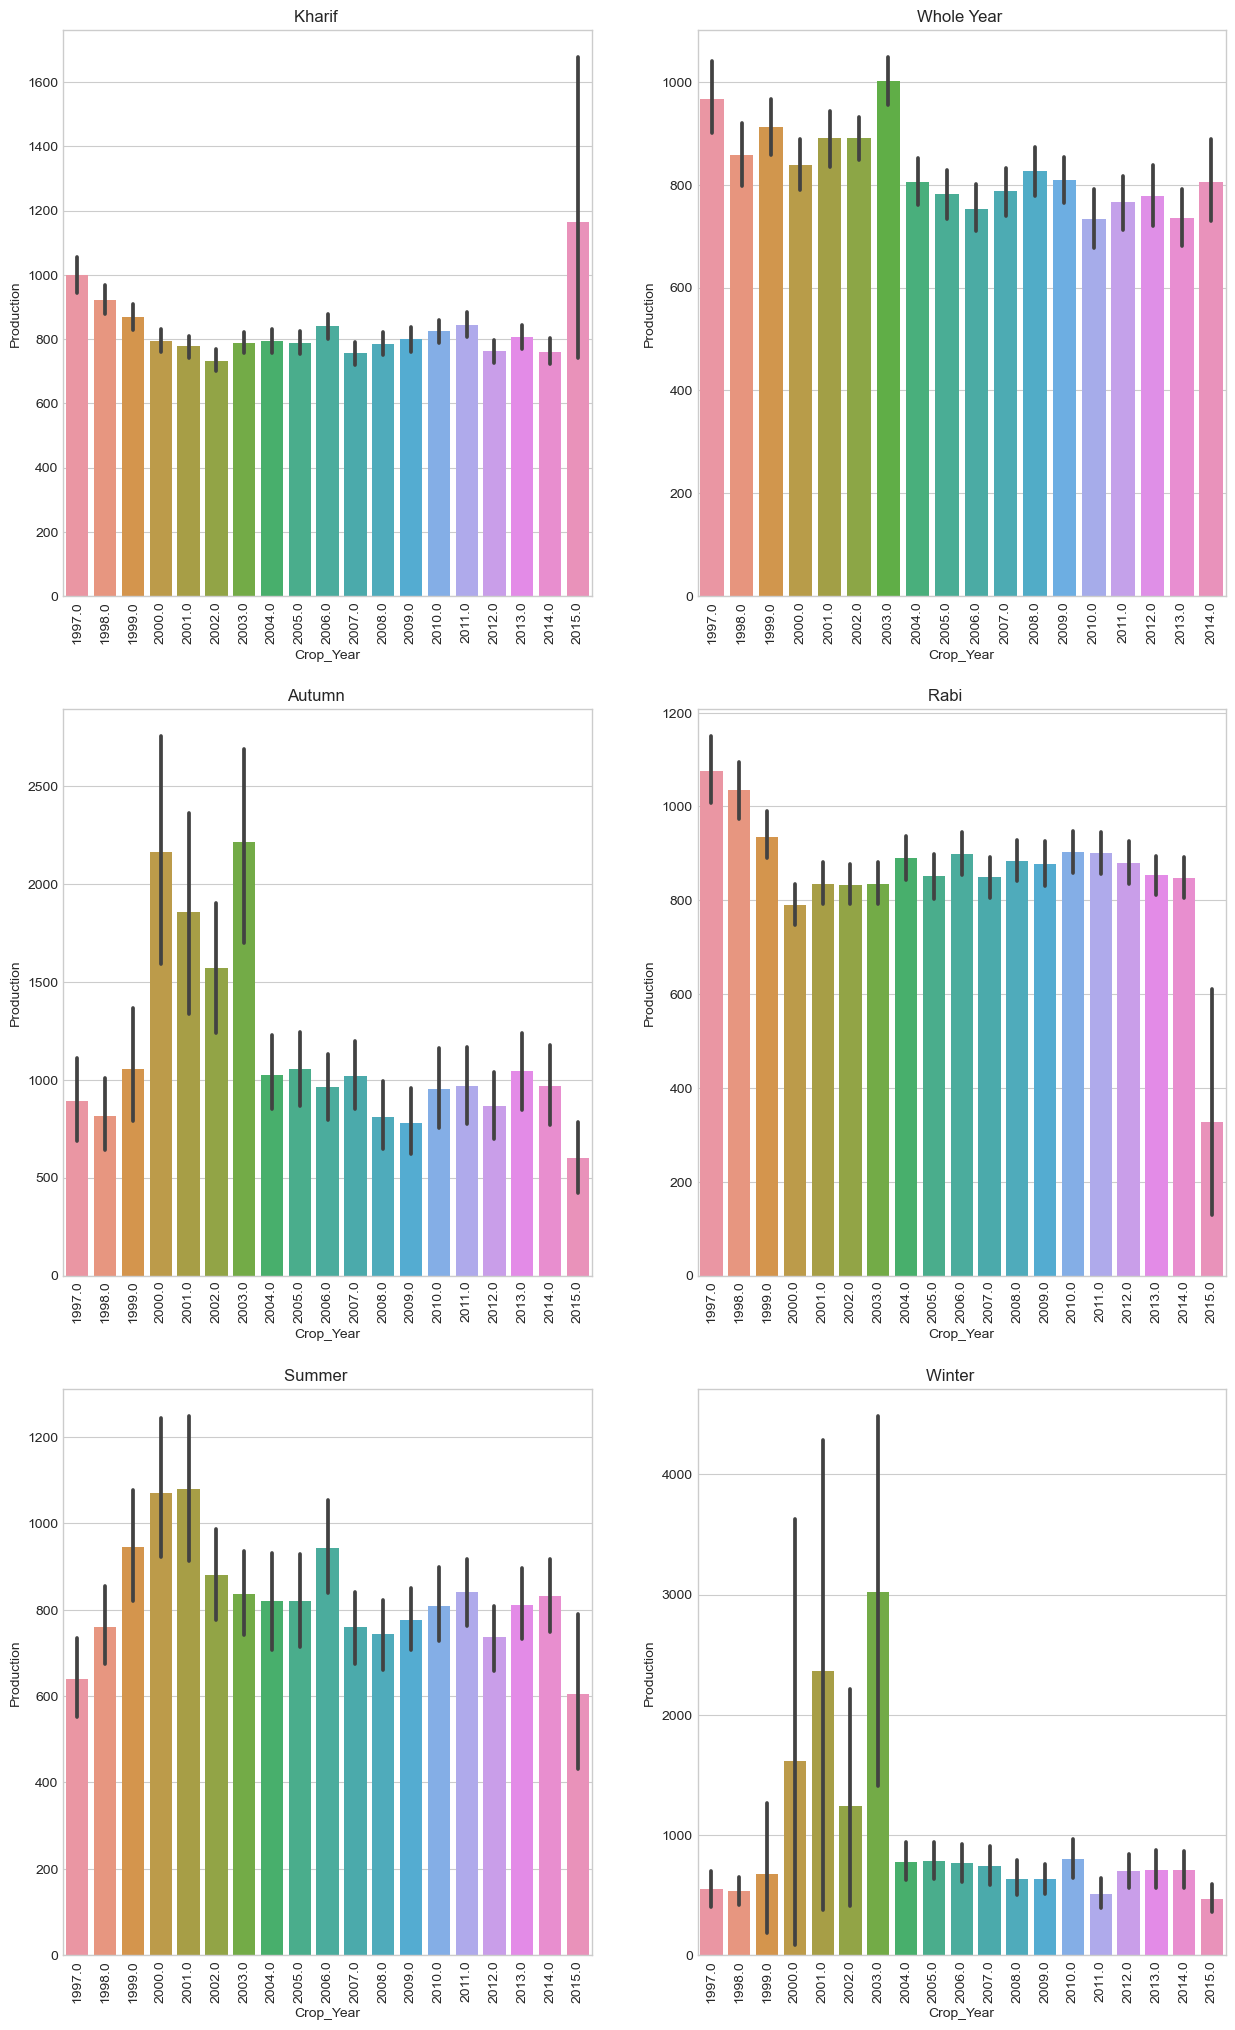

In [125]:
num=1
plt.figure(figsize=(15,25))
for i in crop_new_2.Season.unique():
    plt.subplot(3,2,num)
    sns.barplot(data=crop_new_2[crop_new_2["Season"]==i], x="Crop_Year", y="Production")
    plt.xticks(rotation=90)
    plt.title(i)
    num+=1
    

- During Kharif season the in 2015 there was maximum production 
- Winter crops have very low production exacey of year 2001 and 2003 and similar trend is shown by Auttum.
- Whole year crop does not have vast diffrence.

**Season-Wise v/s Area**

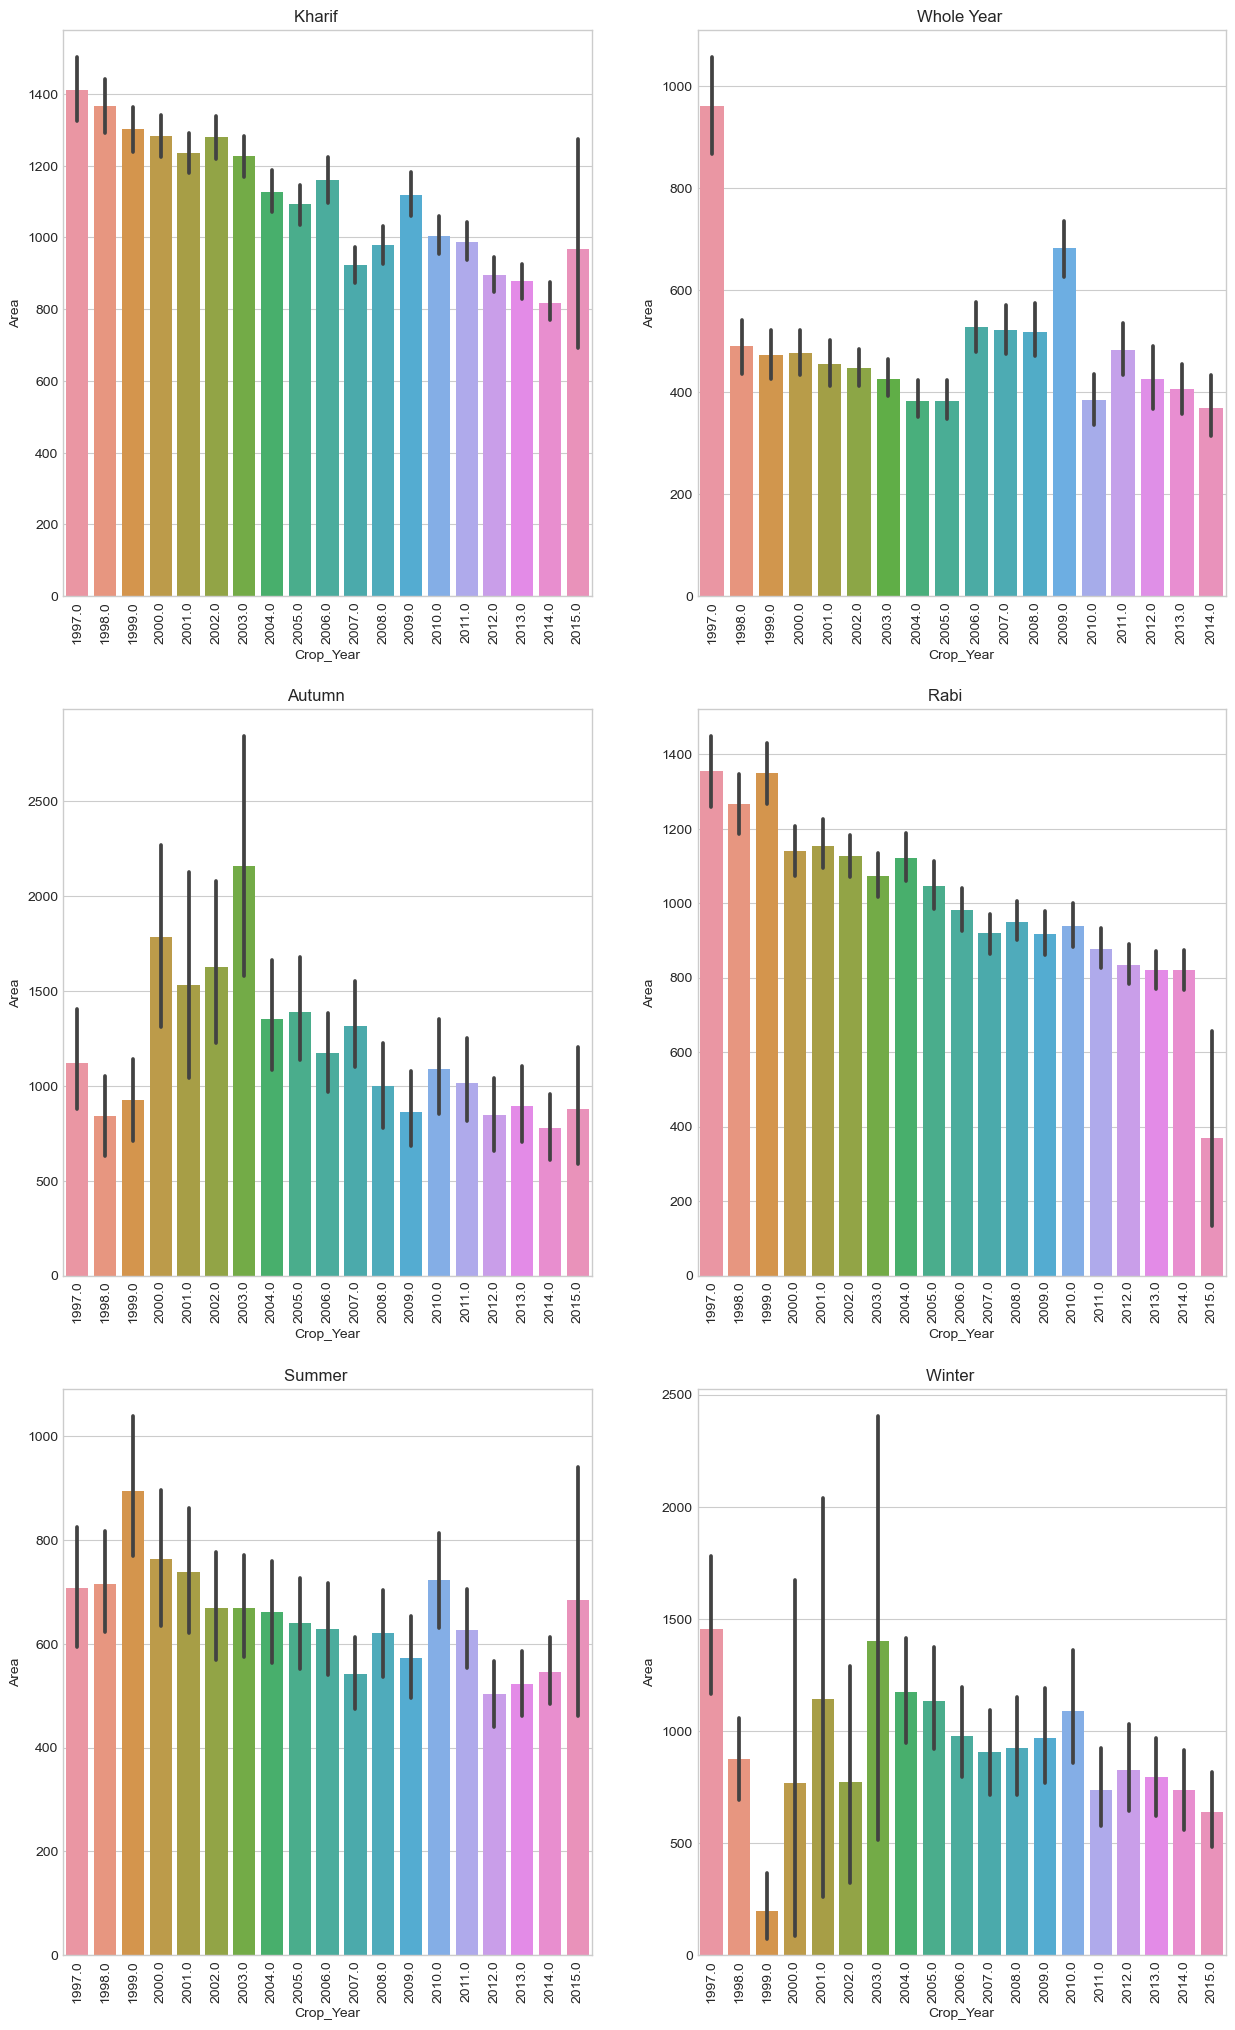

In [126]:
num=1
plt.figure(figsize=(15,25))
for i in crop_new_2.Season.unique():
    plt.subplot(3,2,num)
    sns.barplot(data=crop_new_2[crop_new_2["Season"]==i], x="Crop_Year", y="Area")
    plt.xticks(rotation=90)
    plt.title(i)
    num+=1

- Rabi crops agricural land is decreasing by the years
- Similar but slow tred is seen in Autumn Season and Kharif Season.


#### **Summary**

- The Dataset given was about the Production of Crops from the year 1997 to 2015
- The Traget variable was the "Production" colums.

- Univate Analysis:
    - The agricultural area is Maximum in "Autumn"
    - The States Punjab, Sikkim, Gujarat has maximumn number of Agricutural land among all the states
    - Chandigarh has lowest number of agricultural land.
    - The District Bilaspur has maximum count, i.e it has maximum crop production.
    - Namsai has lowest count, i.e it has lowest crop production.
    - Moong(Green Grams) has maximum count.
    - Rubber has lowest count.
    - The data of Production and Arae highly skweed .
    - This is maybe beacuse that every state has varying number of agricultural land.
    - Every State produce diffrent crops in abundance.
    - The Procudtion is maximum in Autumn Season.
    
    




- Bivariate Analysis
    - During Kharif season the in 2015 there was maximum production 
    - Winter crops have very low production exacey of year 2001 and 2003 and similar trend is shown by Auttum.
    - Whole year crop does not have vast diffrence.
    - Rabi crops agricural land is decreasing by the years
    - Similar but slow tred is seen in Autumn Season and Kharif Season.
    - Production is corretated with agricultural area.

- The Production and Quality of Land for the agricultural is afftected by the year
- Hence we need to take necessary measure to ensure that the production increase by the year
   
